# NBA Awards Predictor 

Part 3: Data Exploration

After creating our extensive cleaned CSVs in part 2, it's time to now do exploratory data analysis in order to understand how to best create models in Part 4. Hence, we will create different visualizations to decide how to remove irrelevant data and build better models using relationships we discover here.

Below is a more detailed table of contents for this notebooks

Note: many statistics, especially in regards to team data, overlap between the different awards and play no significant part in the ultimate award winners. Hence, later awards will not necessarily be explored as in depth as MVP and MIP.



Significant parts of this project were adapted from:
https://github.com/JustinGong03/nba-awards-predictor/blob/master/notebooks/nba_awards_predictor_part1.ipynb
Accessed 2023

More detailed citations are not provided as the general format of EDA follows the above code. However, specific features plotted, style of graphs, have all been edited.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from itertools import product
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [2]:
# Import data
mvp = pd.read_csv("data/dfs/finalMVP.csv")
mip = pd.read_csv("data/dfs/finalMIP.csv")
smoy = pd.read_csv("data/dfs/finalSMOY.csv")
dpoy = pd.read_csv("data/dfs/finalDPOY.csv")
team = pd.read_csv("data/dfs/allTeam.csv")

1. MVP

In [3]:
mvp_winners = mvp[mvp["Share"] != 0]
mvp_winners["Share"].describe()


count    337.000000
mean       0.185116
std        0.283350
min        0.001000
25%        0.003000
50%        0.026000
75%        0.275000
max        1.000000
Name: Share, dtype: float64

In [4]:
sns.set_style("darkgrid")

(array([221.,  18.,  16.,  17.,  15.,  10.,   3.,  14.,   8.,  15.]),
 array([0.001 , 0.1009, 0.2008, 0.3007, 0.4006, 0.5005, 0.6004, 0.7003,
        0.8002, 0.9001, 1.    ]),
 <BarContainer object of 10 artists>)

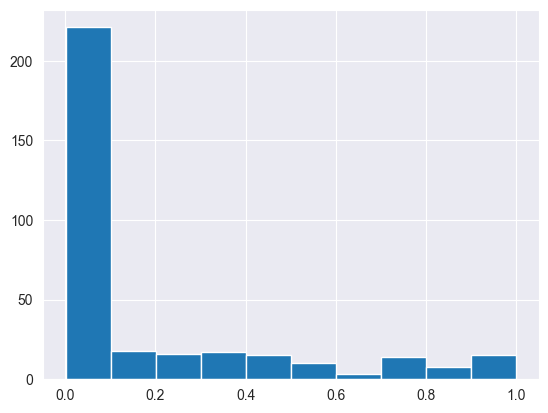

In [5]:
plt.hist(mvp_winners["Share"])

Bivariate Analysis with Selected Features

We will inspect a variety of our chosen features to see impact on the MVP race.

Text(0.5, 0.98, 'Per Game Statistics')

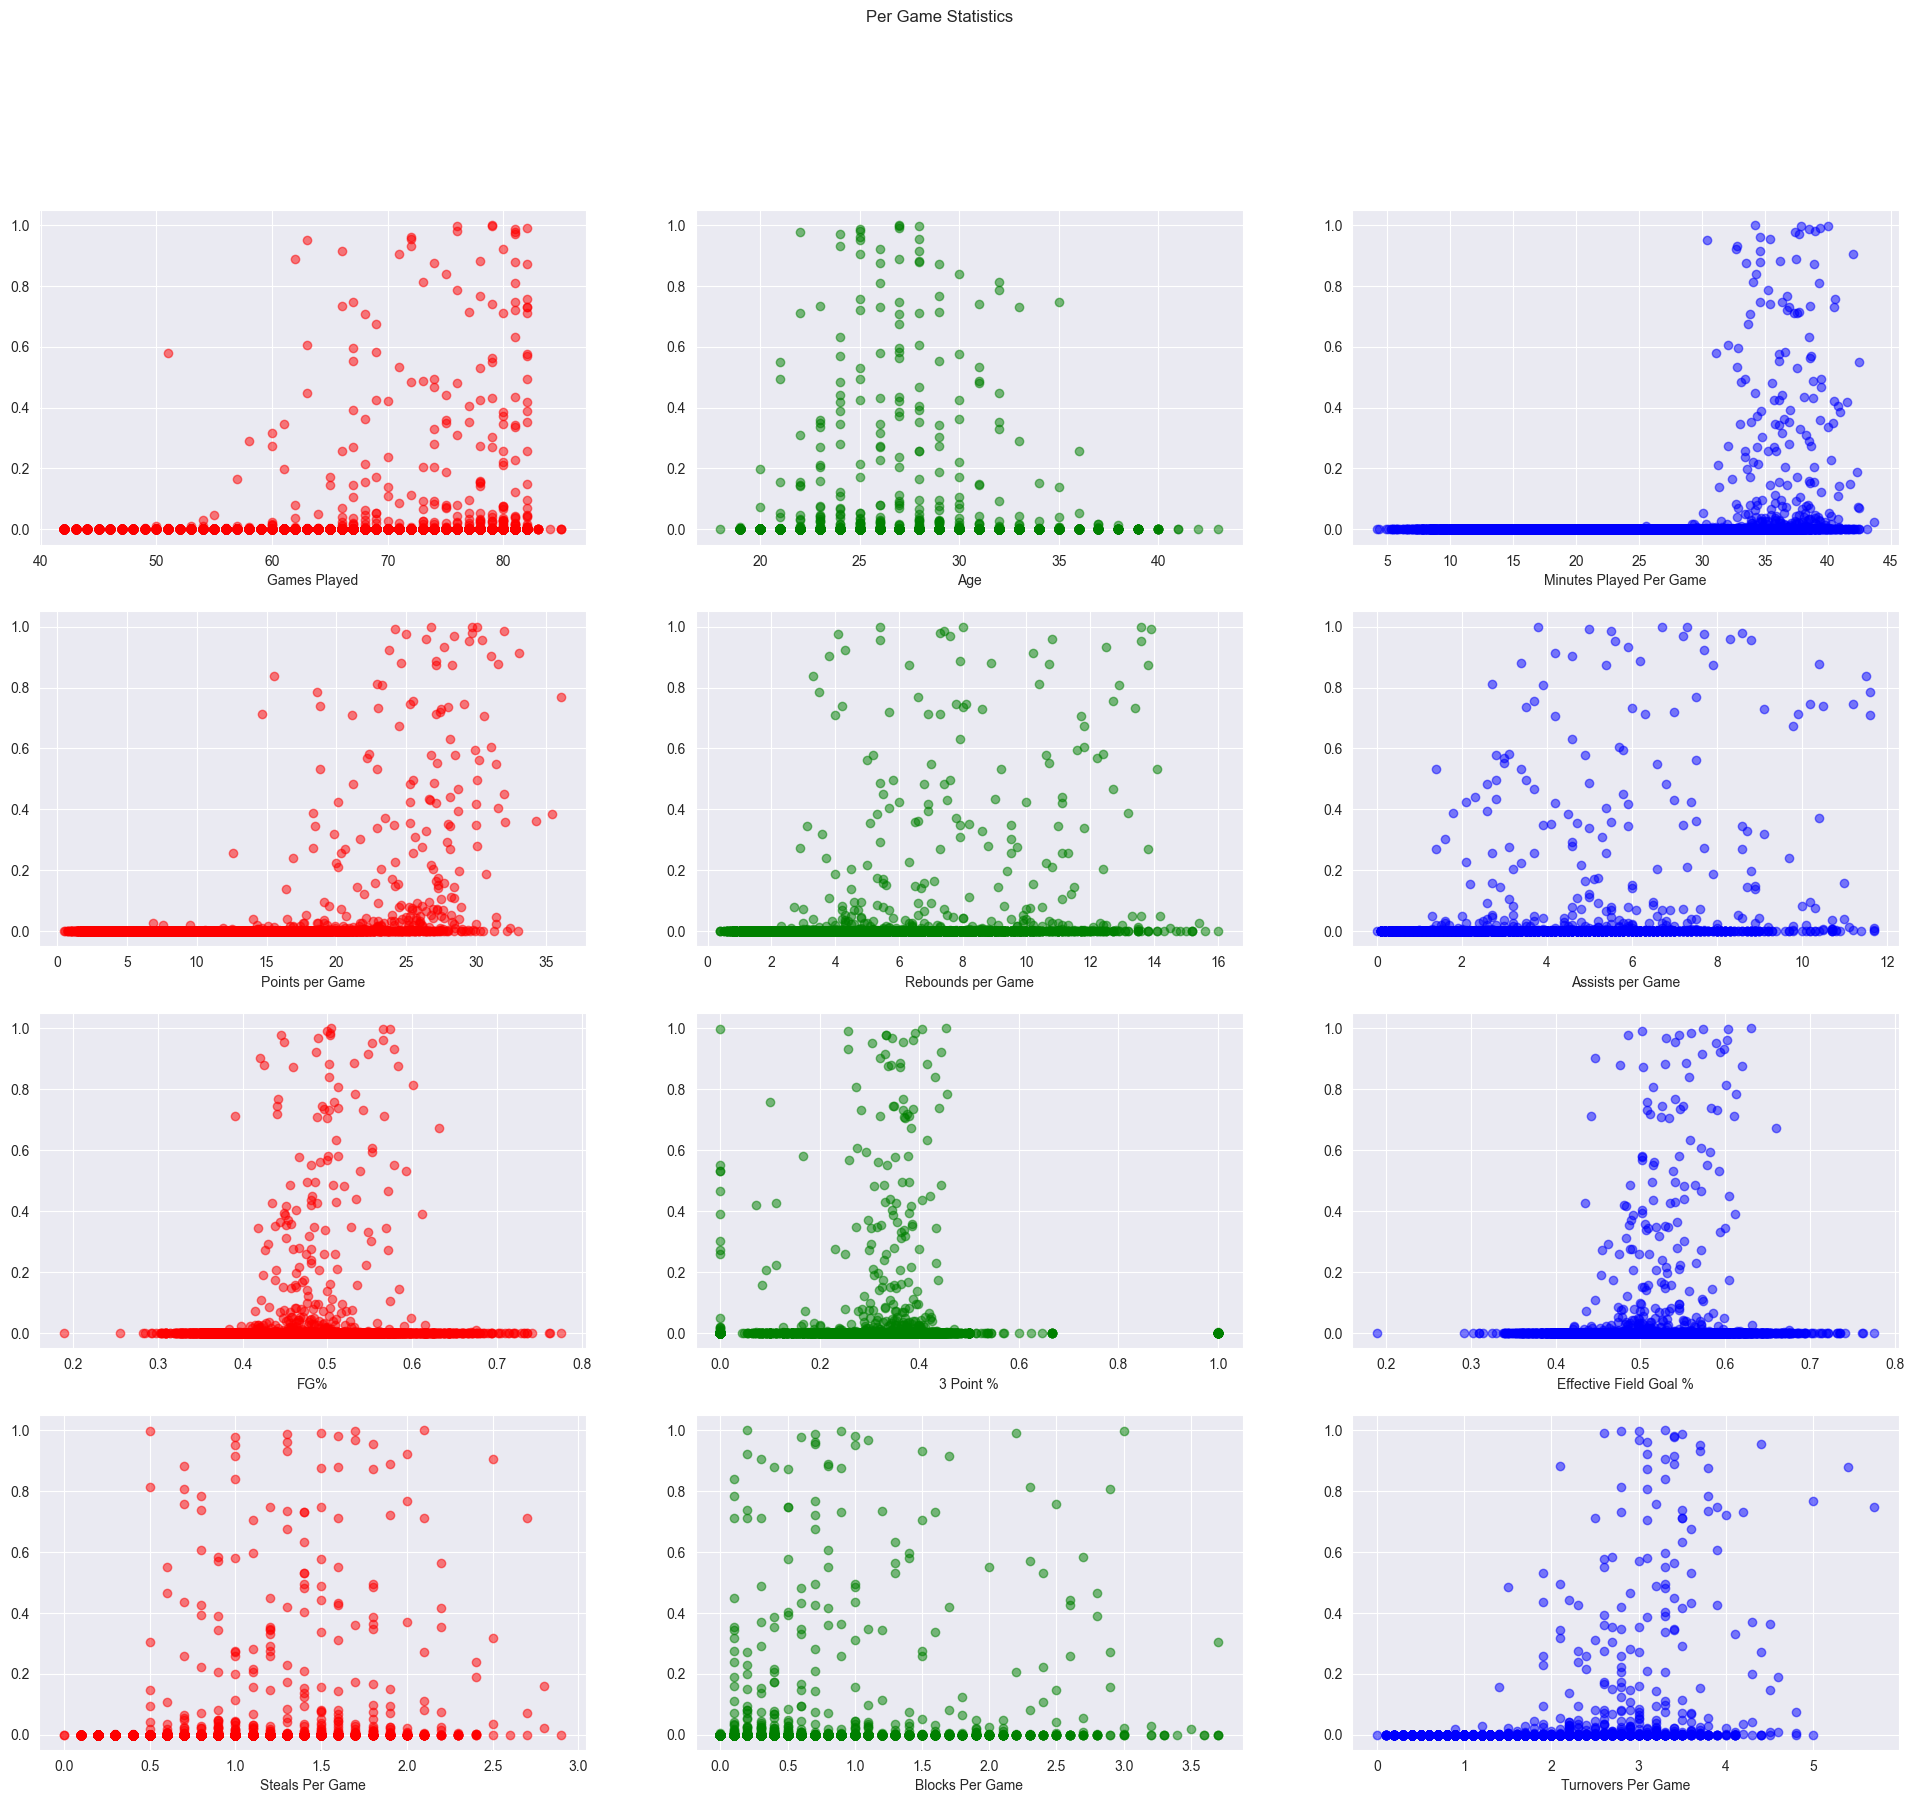

In [6]:
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (24, 20))
plt.subplot(4, 3, 1)
plt.scatter(mvp["G"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("Games Played")

plt.subplot(4, 3, 2)
plt.scatter(mvp["Age"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("Age")

plt.subplot(4, 3, 3)
plt.scatter(mvp["MP"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Minutes Played Per Game")

plt.subplot(4, 3, 4)
plt.scatter(mvp["PTS"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("Points per Game")

plt.subplot(4, 3, 5)
plt.scatter(mvp["TRB"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("Rebounds per Game")

plt.subplot(4, 3, 6)
plt.scatter(mvp["AST"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Assists per Game")

plt.subplot(4, 3, 7)
plt.scatter(mvp["FG%"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("FG%")

plt.subplot(4, 3, 8)
plt.scatter(mvp["3P%"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("3 Point %")

plt.subplot(4, 3, 9)
plt.scatter(mvp["eFG%"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Effective Field Goal %")

plt.subplot(4, 3, 10)
plt.scatter(mvp["STL"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("Steals Per Game")

plt.subplot(4, 3, 11)
plt.scatter(mvp["BLK"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("Blocks Per Game")

plt.subplot(4, 3, 12)
plt.scatter(mvp["TOV"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Turnovers Per Game")

plt.suptitle("Per Game Statistics")


Per 36 Minute Statistics

We also will inspect per-36 minute statistics. If we find many similarities with per game statistics, it is likely that we could use reduce our features to include one of these sets.

Text(0.5, 0.98, 'Per 36 Minutes Statistics')

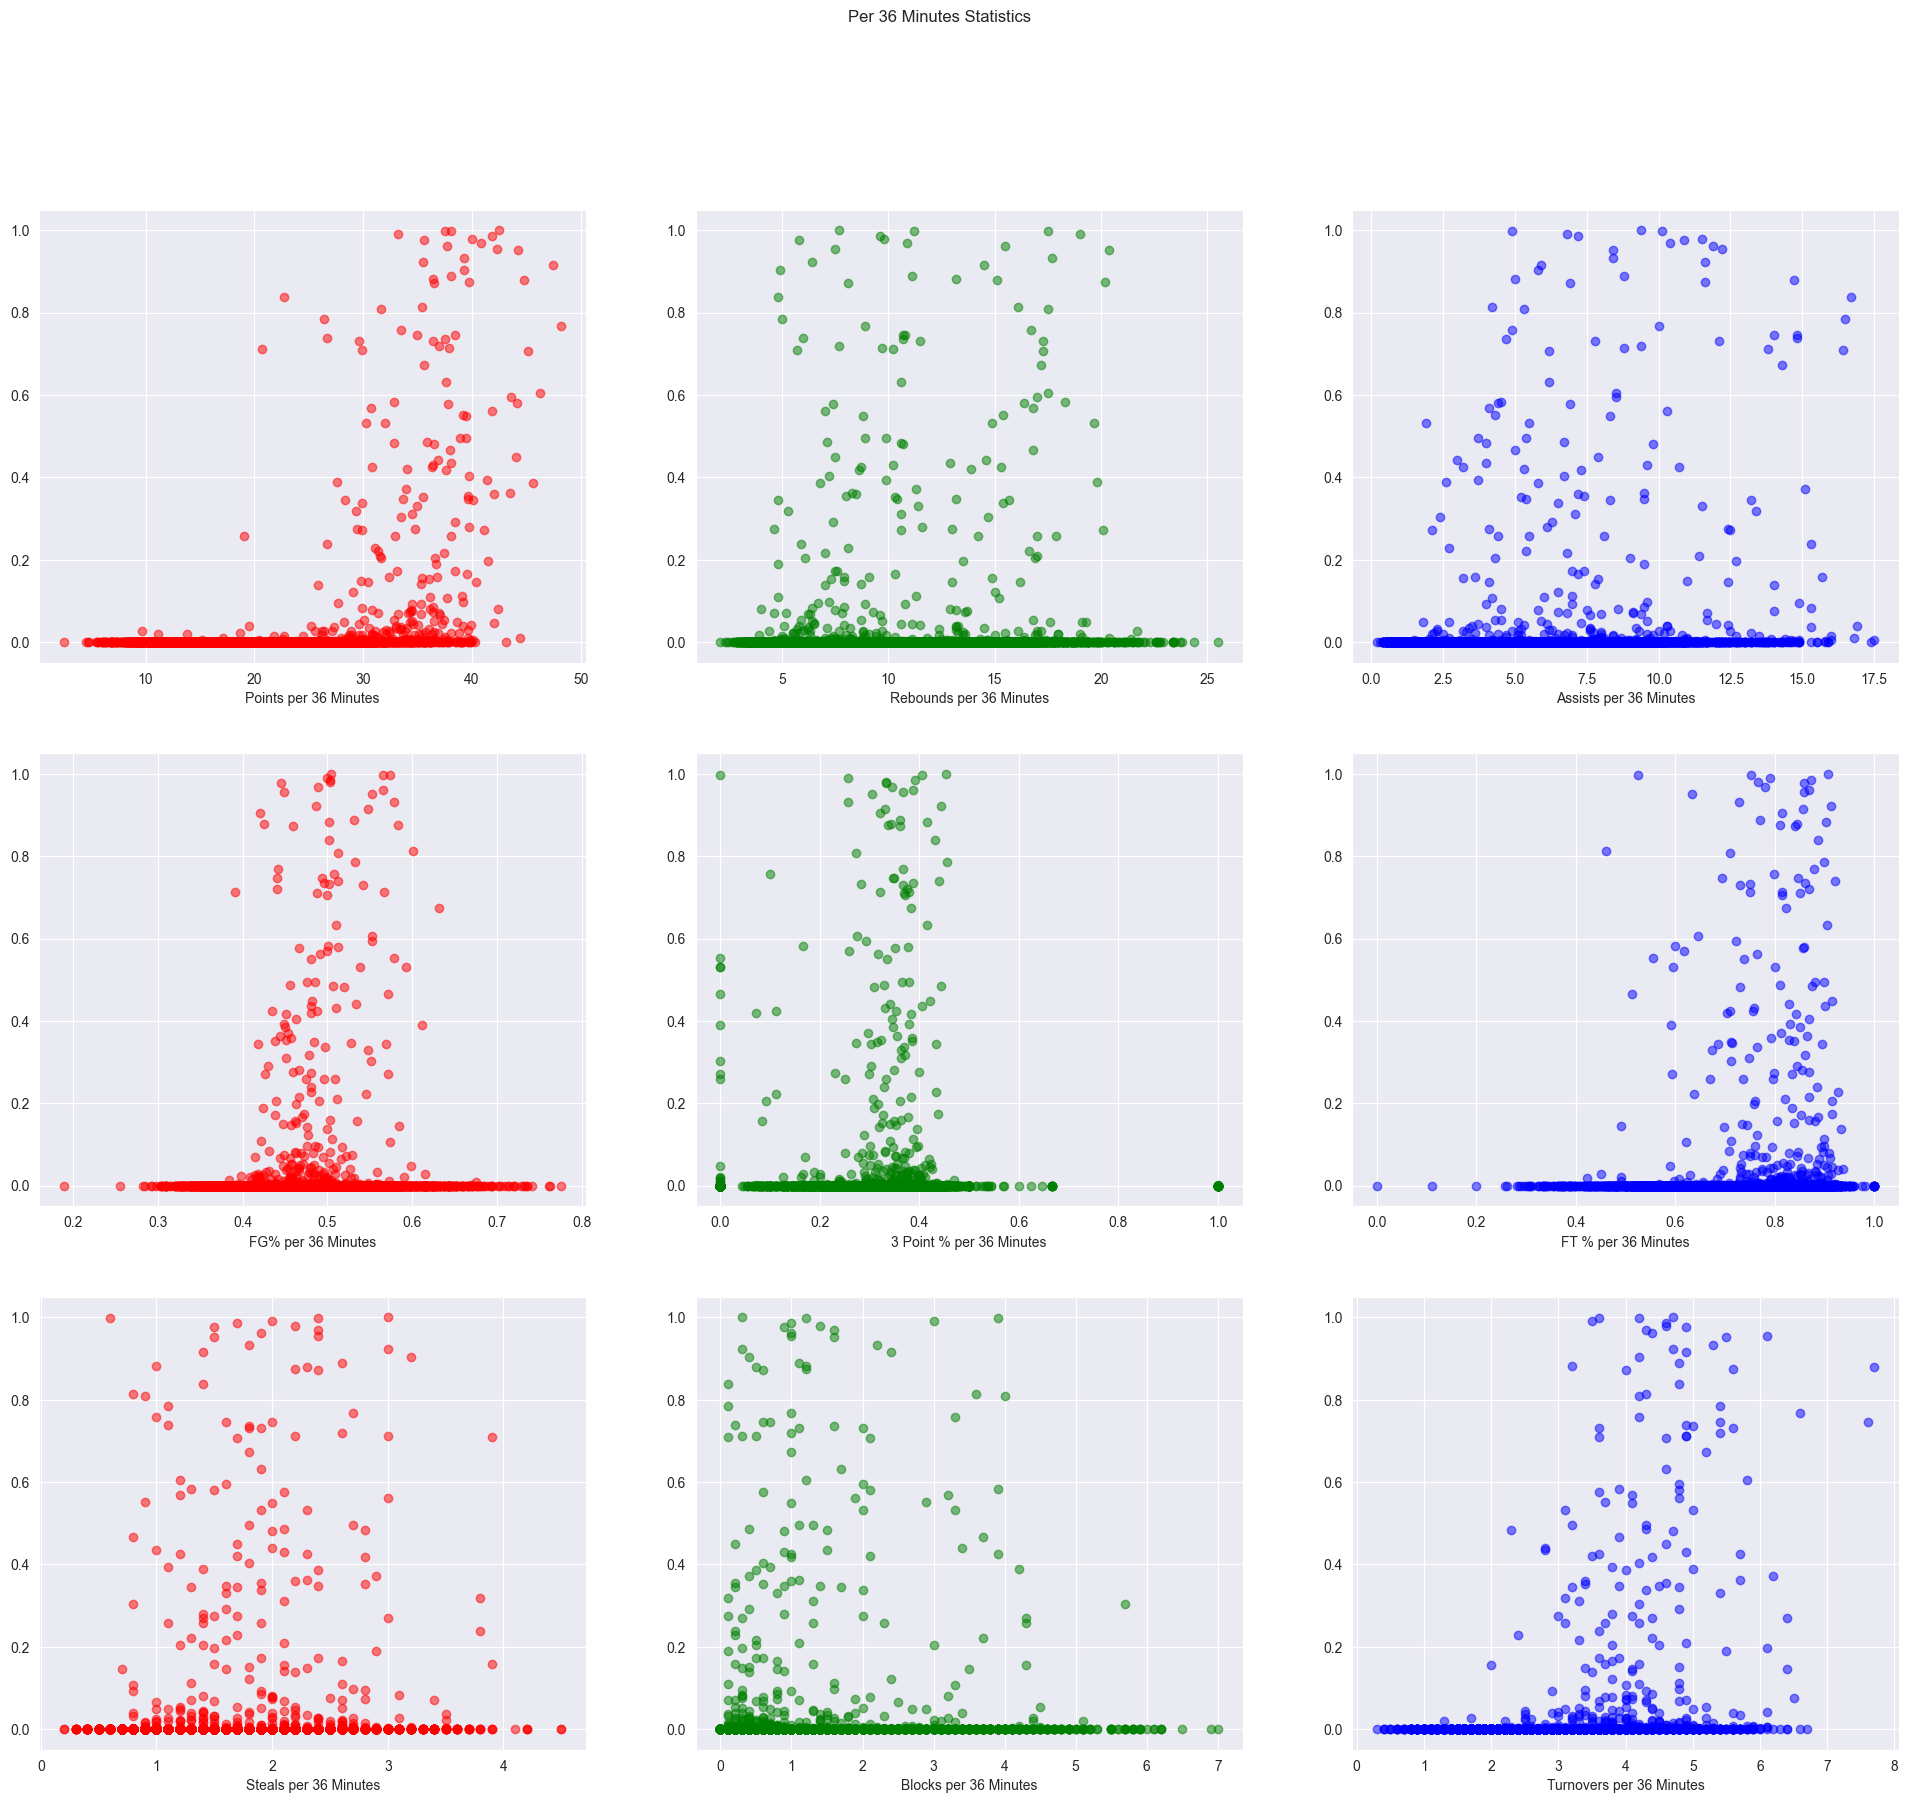

In [7]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (24, 20))

plt.subplot(3, 3, 1)
plt.scatter(mvp["PTS_per36"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("Points per 36 Minutes")

plt.subplot(3, 3, 2)
plt.scatter(mvp["TRB_per36"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("Rebounds per 36 Minutes")

plt.subplot(3, 3, 3)
plt.scatter(mvp["AST_per36"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Assists per 36 Minutes")

plt.subplot(3, 3, 4)
plt.scatter(mvp["FG%_per36"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("FG% per 36 Minutes")

plt.subplot(3, 3, 5)
plt.scatter(mvp["3P%_per36"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("3 Point % per 36 Minutes")

plt.subplot(3, 3, 6)
plt.scatter(mvp["FT%_per36"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("FT % per 36 Minutes")

plt.subplot(3, 3, 7)
plt.scatter(mvp["STL_per36"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("Steals per 36 Minutes")

plt.subplot(3, 3, 8)
plt.scatter(mvp["BLK_per36"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("Blocks per 36 Minutes")

plt.subplot(3, 3, 9)
plt.scatter(mvp["TOV_per36"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Turnovers per 36 Minutes")

plt.suptitle("Per 36 Minutes Statistics")


Advanced Statistics

Similarly, we will create graphs to see the effect of various advanced statistics.

Text(0.5, 0, 'Defensive Win Shares')

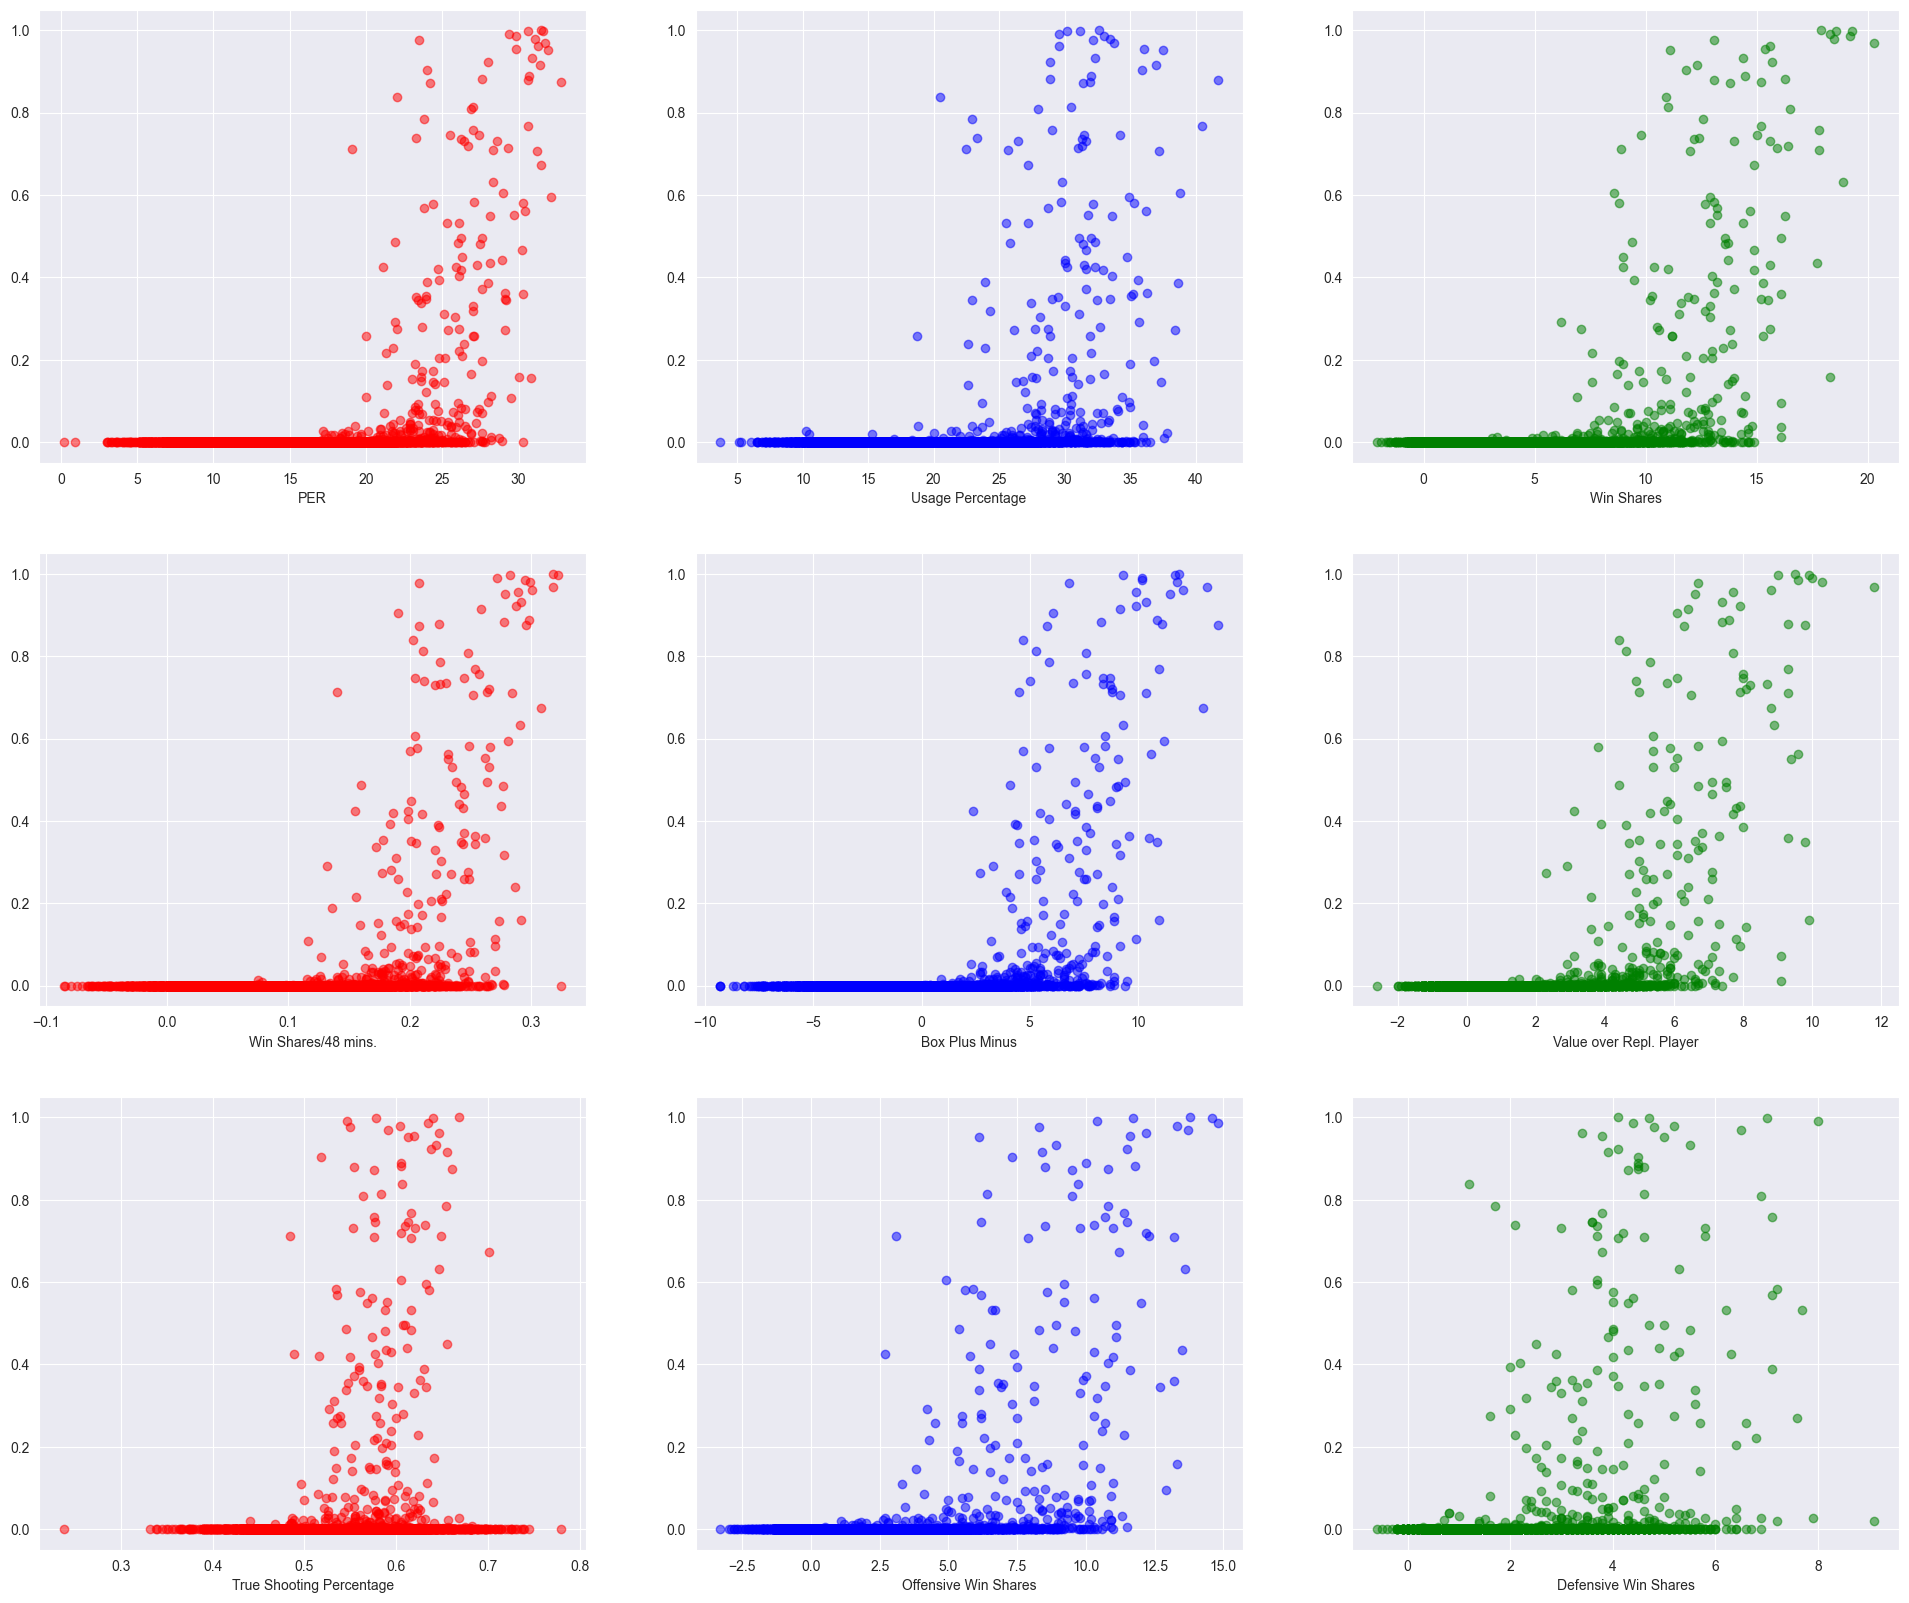

In [8]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (24, 20))
plt.subplot(3, 3, 1)
plt.scatter(mvp["PER"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("PER")

plt.subplot(3, 3, 2)
plt.scatter(mvp["USG%"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Usage Percentage")

plt.subplot(3, 3, 3)
plt.scatter(mvp["WS"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("Win Shares")

plt.subplot(3, 3, 4)
plt.scatter(mvp["WS/48"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("Win Shares/48 mins.")

plt.subplot(3, 3, 5)
plt.scatter(mvp["BPM"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Box Plus Minus")

plt.subplot(3, 3, 6)
plt.scatter(mvp["VORP"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("Value over Repl. Player")

plt.subplot(3, 3, 7)
plt.scatter(mvp["TS%"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("True Shooting Percentage")

plt.subplot(3, 3, 8)
plt.scatter(mvp["OWS"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Offensive Win Shares")

plt.subplot(3, 3, 9)
plt.scatter(mvp["DWS"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("Defensive Win Shares")

Takeaways

- Data in both the per_36 minute and per_game categories are fairly similar, which makes sense as per 36 minute data is per_game data proportionately scaled for 36 minutes. Neither reveal too strong of an influence on MVP shares, with some small trends seen but no generalities.
- Advanced statistics, however, seem to have a greater influence. Most of a linear relationship with MVP share, so an emphasis on these in our models may be useful.
- In part 2, it was discussed that under the new CBA, at least 65 games must be played to even be considered for MVP or any other major awards this coming year. Our data here indicates that this is naturally also a trend, with a majority of vote-getters always playing at least 65 games.
- MVP vote-getters all seem to average at least 15 points a game, however, no such generalities can be found for assists or rebounds. 
- Offense and defense appears to be equally important. Very few players that have either a low offensive or defensive win share contribution gained MVP votes.

The Influence of Team Statistics

Text(0.5, 0.98, "Player's Team's Statistics")

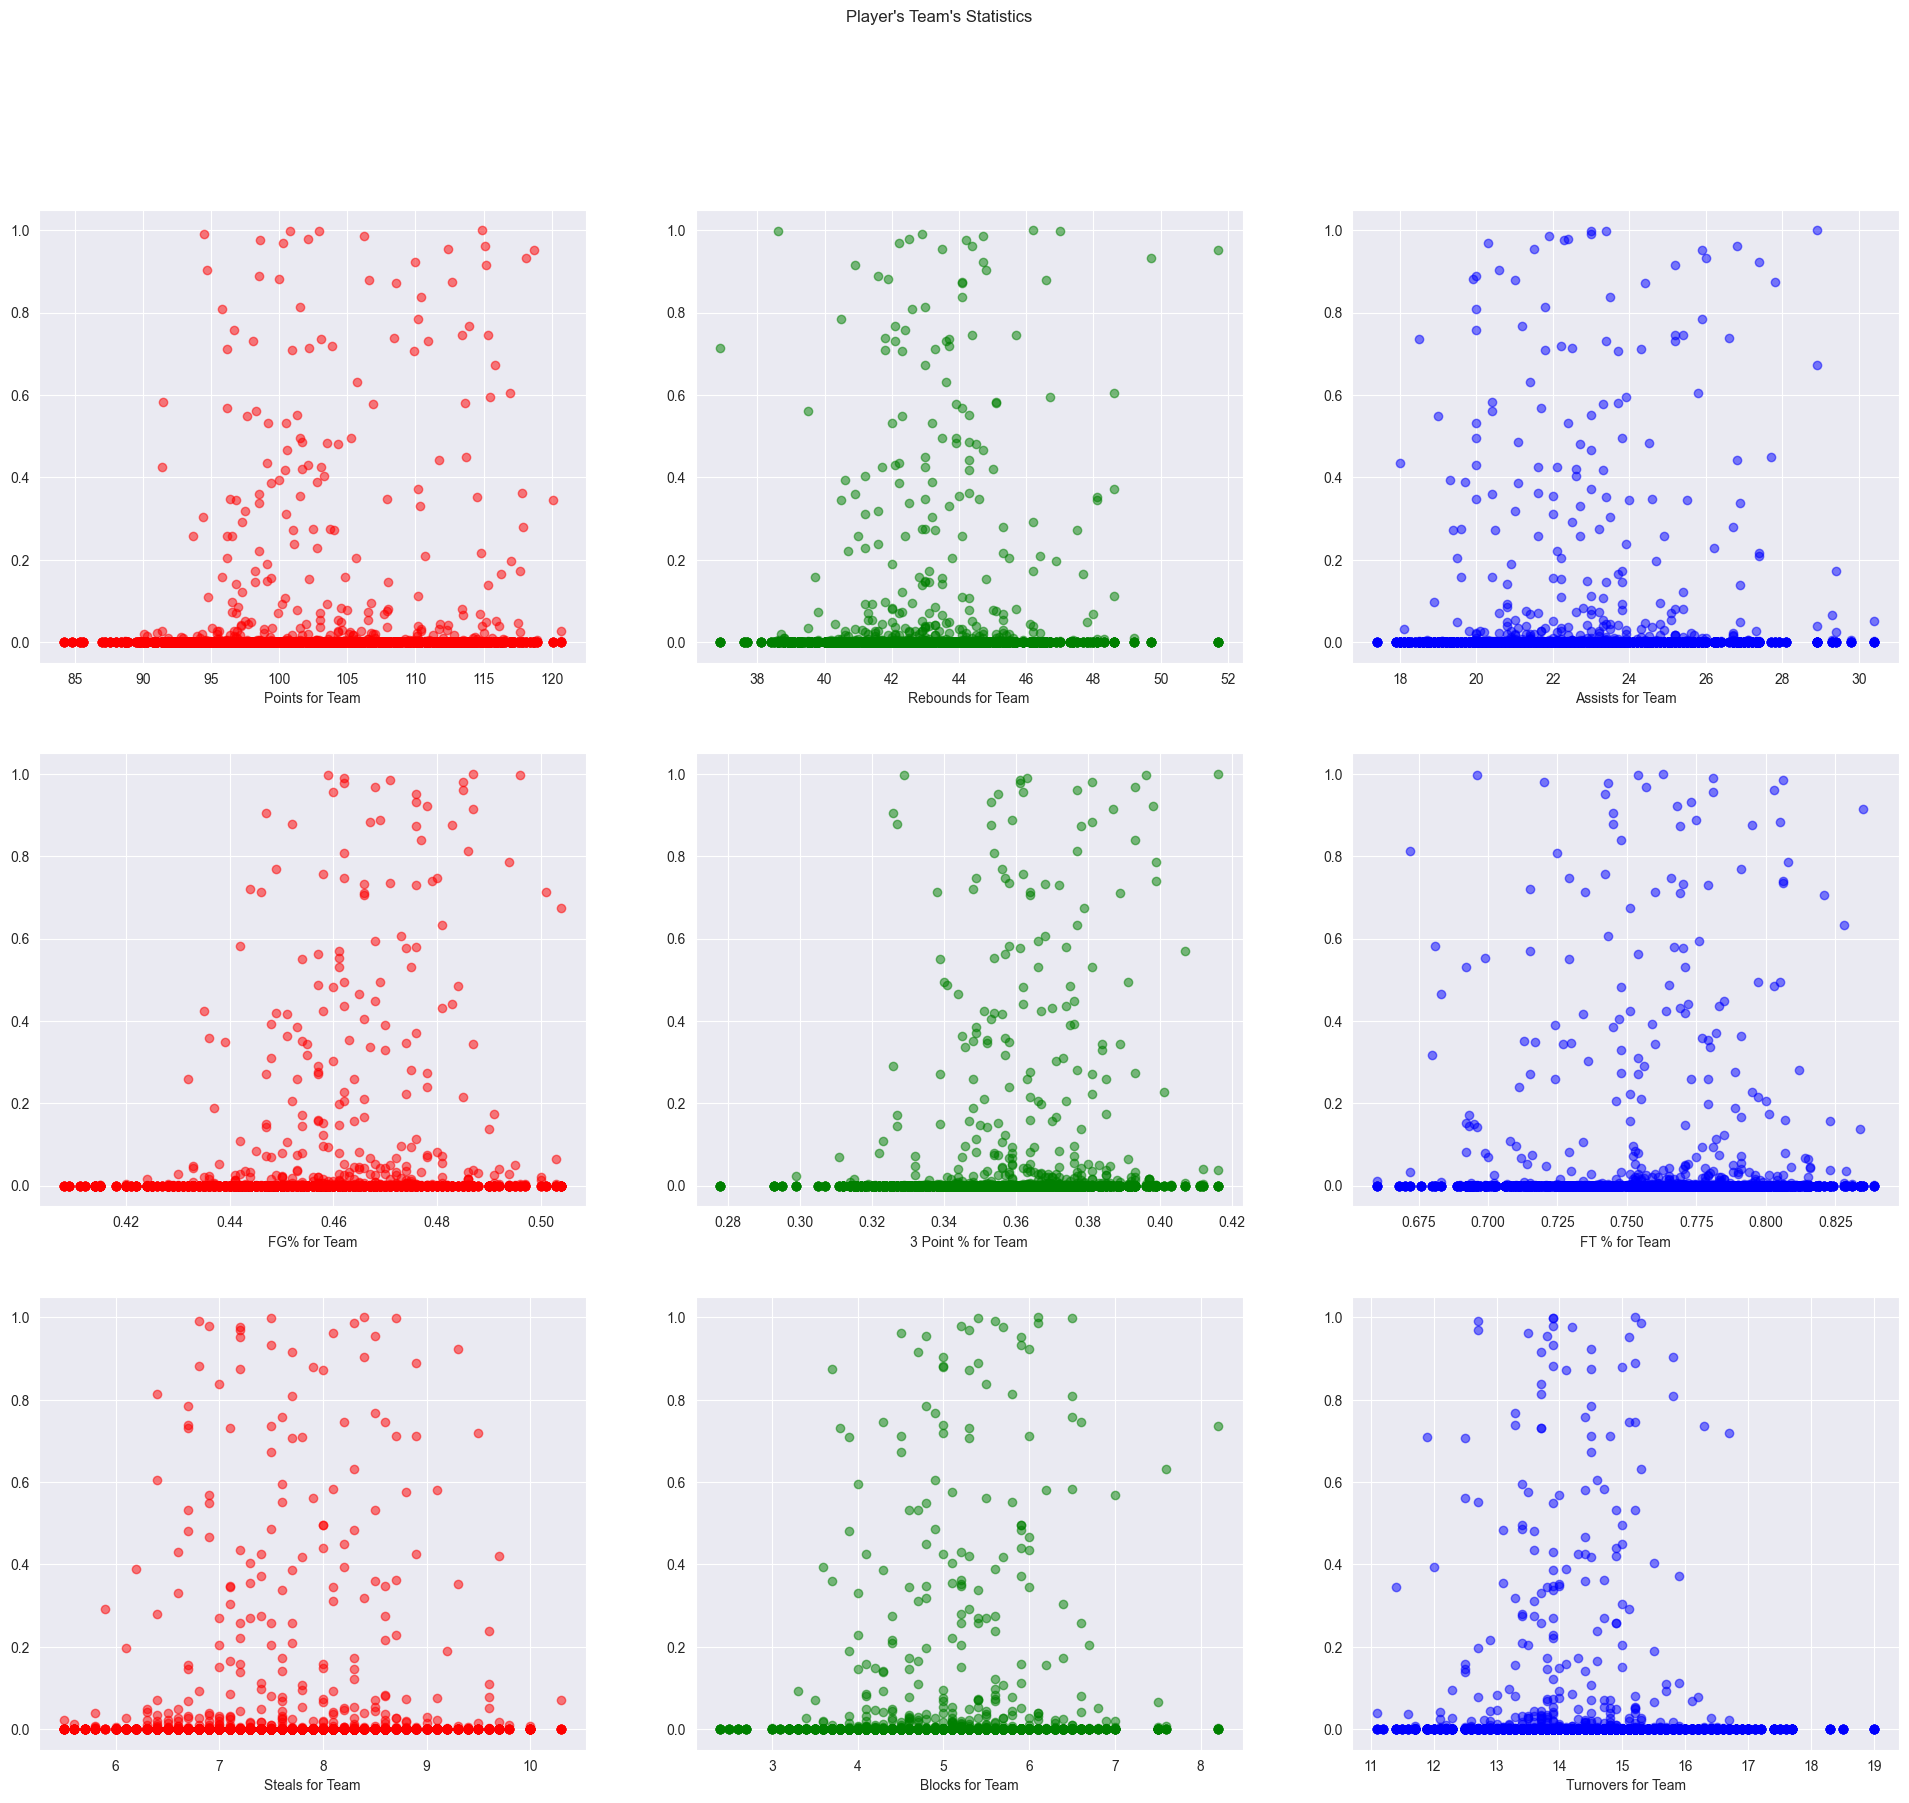

In [9]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (24, 20))

plt.subplot(3, 3, 1)
plt.scatter(mvp["PTS_team"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("Points for Team")

plt.subplot(3, 3, 2)
plt.scatter(mvp["TRB_team"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("Rebounds for Team")

plt.subplot(3, 3, 3)
plt.scatter(mvp["AST_team"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Assists for Team")

plt.subplot(3, 3, 4)
plt.scatter(mvp["FG%_team"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("FG% for Team")

plt.subplot(3, 3, 5)
plt.scatter(mvp["3P%_team"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("3 Point % for Team")

plt.subplot(3, 3, 6)
plt.scatter(mvp["FT%_team"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("FT % for Team")

plt.subplot(3, 3, 7)
plt.scatter(mvp["STL_team"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("Steals for Team")

plt.subplot(3, 3, 8)
plt.scatter(mvp["BLK_team"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("Blocks for Team")

plt.subplot(3, 3, 9)
plt.scatter(mvp["TOV_team"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Turnovers for Team")

plt.suptitle("Player's Team's Statistics")


Text(0.5, 0.98, "Player's Team's Defensive Statistics")

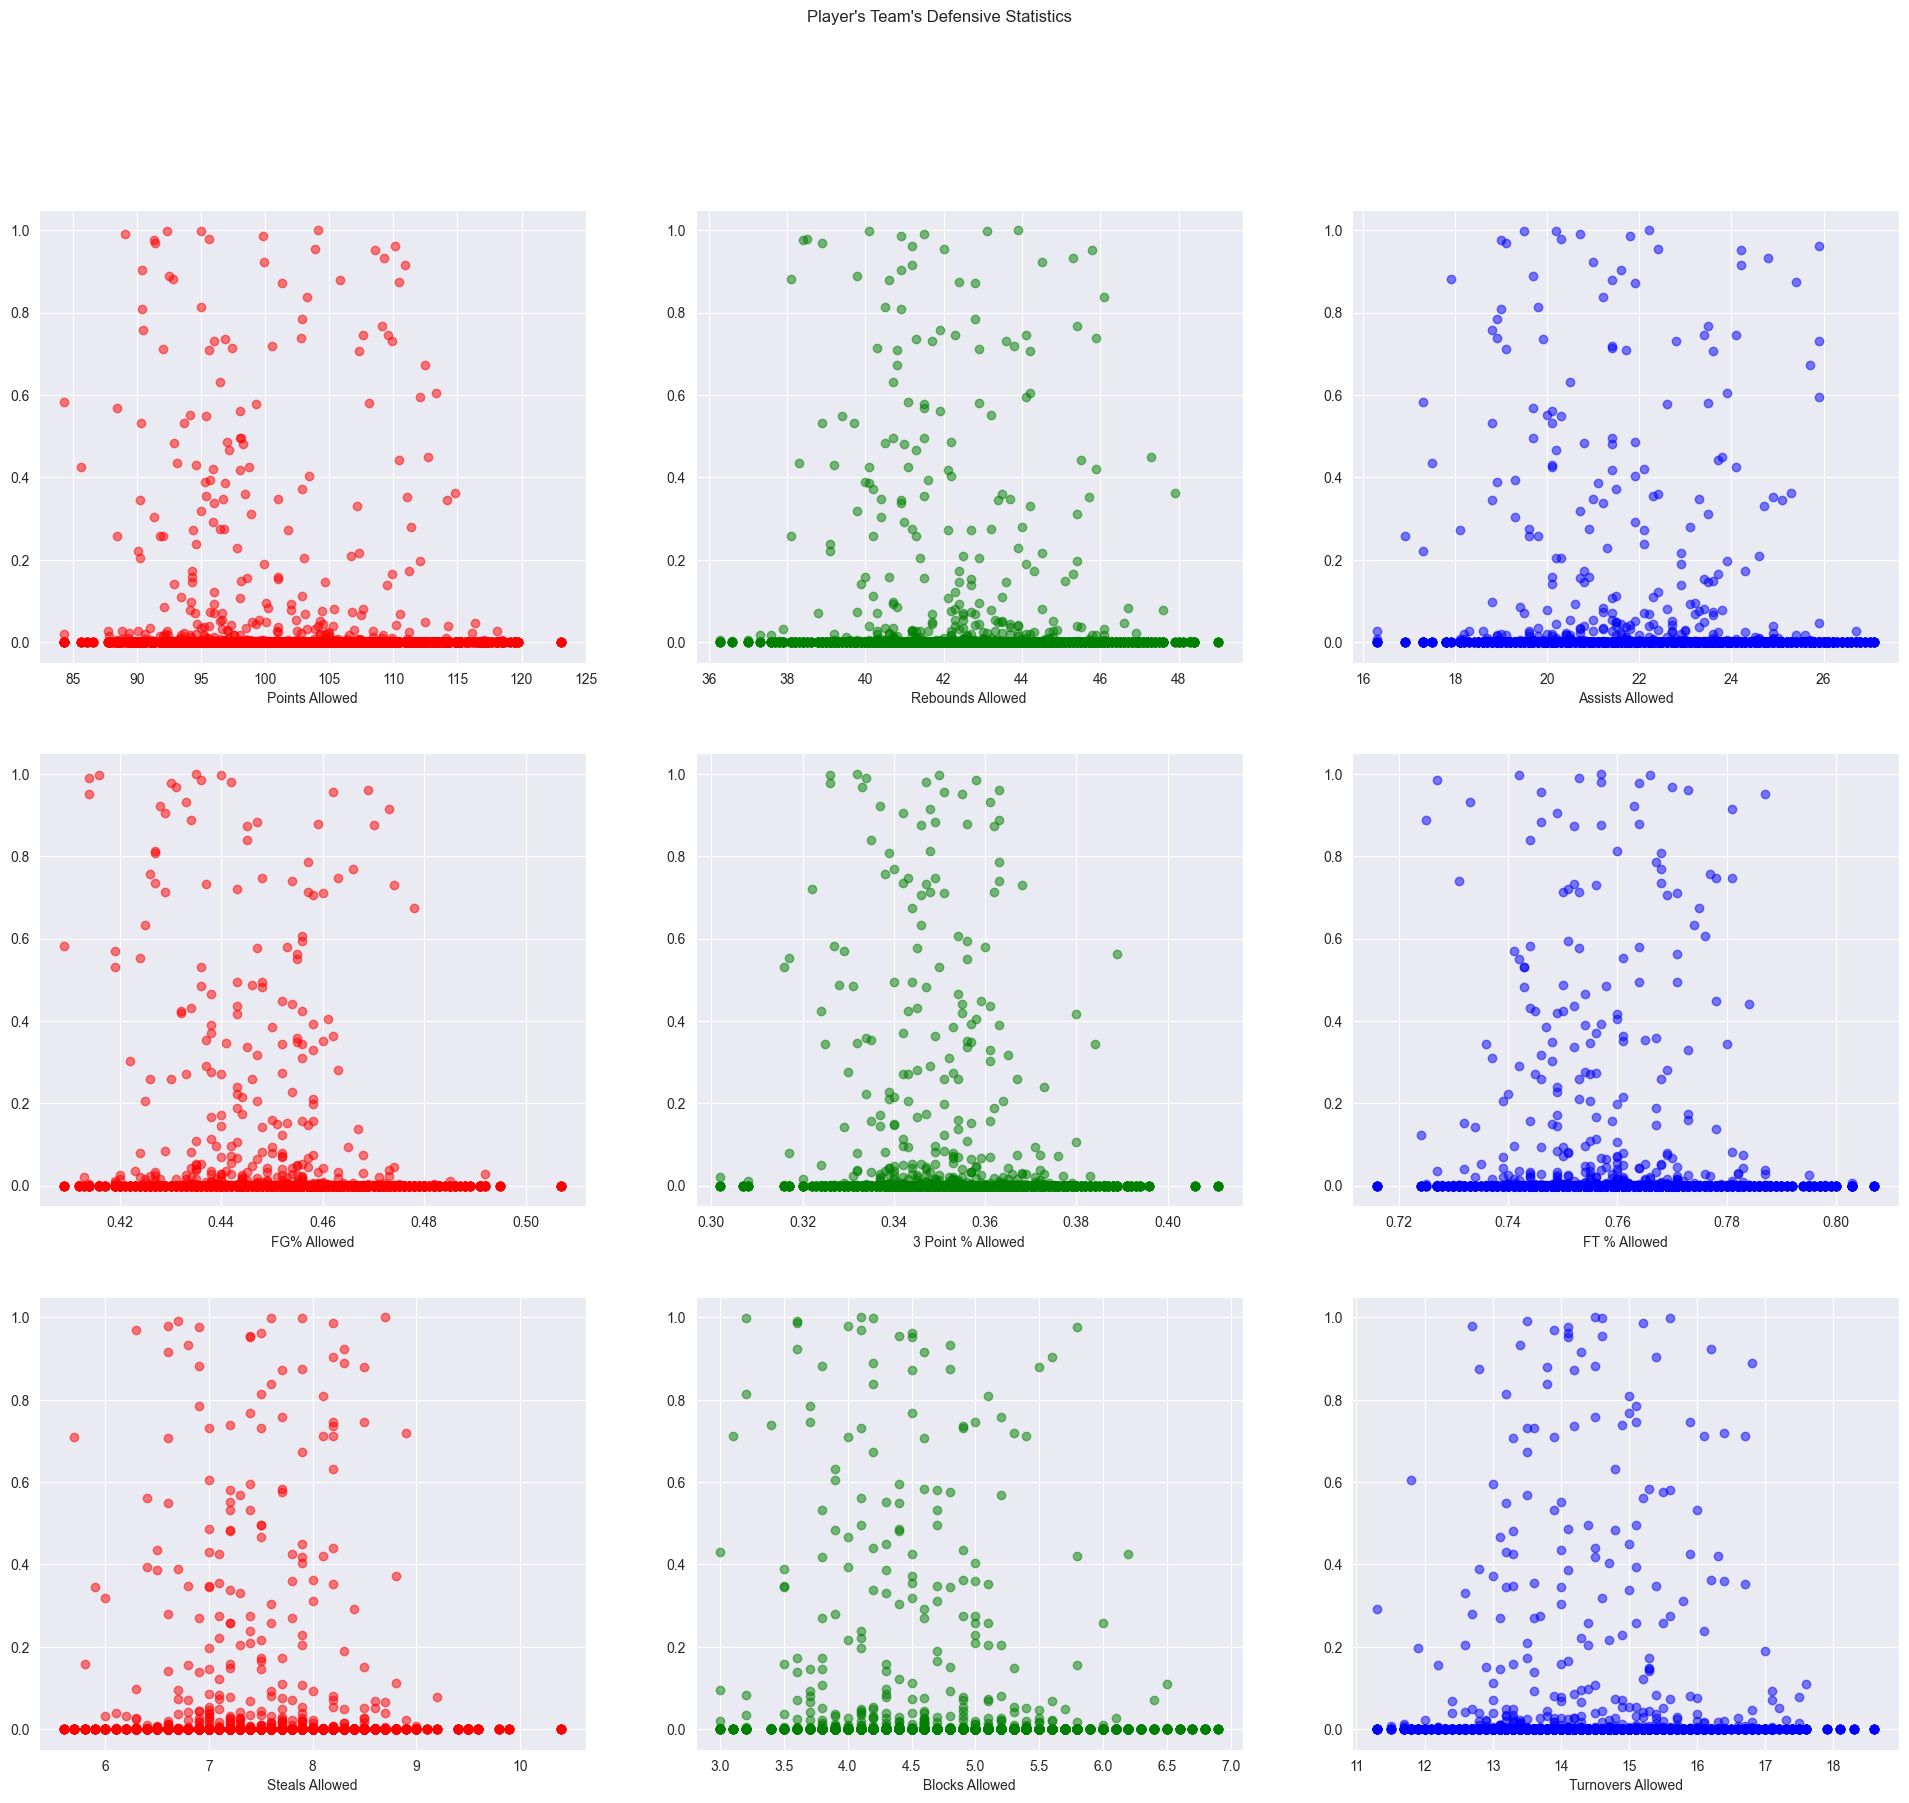

In [10]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (24, 20))

plt.subplot(3, 3, 1)
plt.scatter(mvp["PTS_defense"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("Points Allowed")

plt.subplot(3, 3, 2)
plt.scatter(mvp["TRB_defense"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("Rebounds Allowed")

plt.subplot(3, 3, 3)
plt.scatter(mvp["AST_defense"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Assists Allowed")

plt.subplot(3, 3, 4)
plt.scatter(mvp["FG%_defense"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("FG% Allowed")

plt.subplot(3, 3, 5)
plt.scatter(mvp["3P%_defense"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("3 Point % Allowed")

plt.subplot(3, 3, 6)
plt.scatter(mvp["FT%_defense"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("FT % Allowed")

plt.subplot(3, 3, 7)
plt.scatter(mvp["STL_defense"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("Steals Allowed")

plt.subplot(3, 3, 8)
plt.scatter(mvp["BLK_defense"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("Blocks Allowed")

plt.subplot(3, 3, 9)
plt.scatter(mvp["TOV_defense"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Turnovers Allowed")

plt.suptitle("Player's Team's Defensive Statistics")


Text(0.5, 0, 'Team Net Rating')

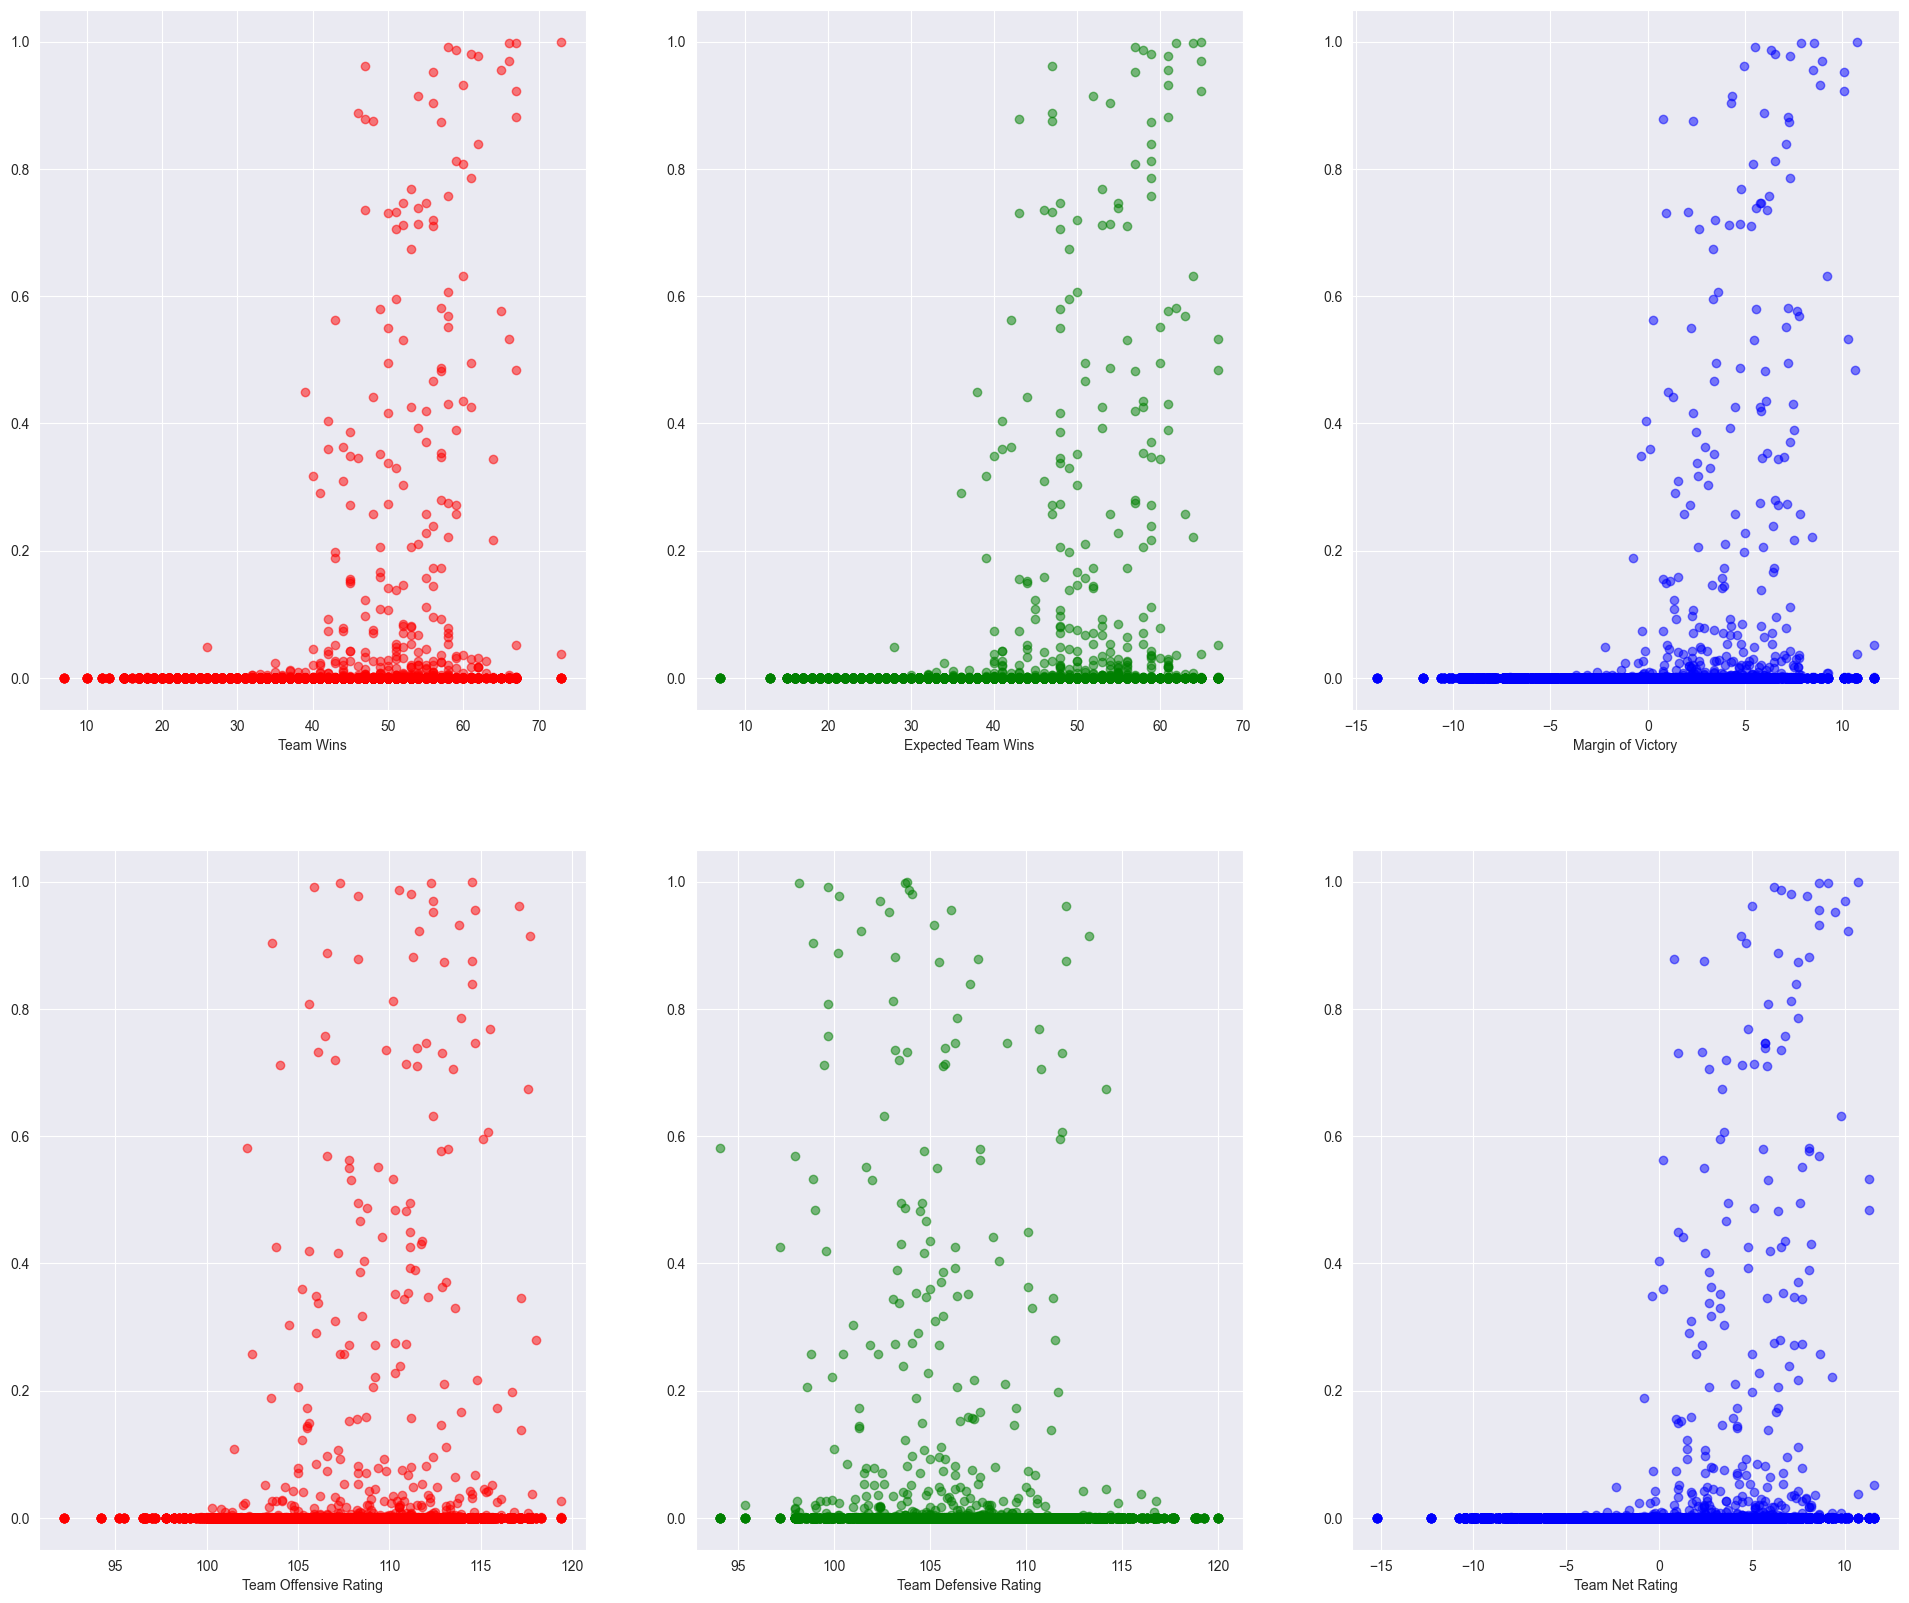

In [11]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (24, 20))

plt.subplot(2, 3, 1)
plt.scatter(mvp["W_team"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("Team Wins")

plt.subplot(2, 3, 2)
plt.scatter(mvp["PW_team"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("Expected Team Wins")

plt.subplot(2, 3, 3)
plt.scatter(mvp["MOV_team"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Margin of Victory")

plt.subplot(2, 3, 4)
plt.scatter(mvp["ORtg_team"], mvp["Share"], c = "red", alpha = 0.5)
plt.xlabel("Team Offensive Rating")

plt.subplot(2, 3, 5)
plt.scatter(mvp["DRtg_team"], mvp["Share"], c = "green", alpha = 0.5)
plt.xlabel("Team Defensive Rating")

plt.subplot(2, 3, 6)
plt.scatter(mvp["NRtg_team"], mvp["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Team Net Rating")

Takeaways:

Most correlations between MVP share and team statistics are fairly weak, especially in regards to overall offense or defense statistics. However, some advanced statistics, namely team net rating, does appear to have a small positive correlation. Even more, nearly no MVP share getter won less than 40 games, and the minimum for .8 of the vote share is 45 games. A greater margin of victory also positively correlates.

Continuous Numerical Analysis: Checking Normality

Next, let's observe skew in our continuous variables in order to understand what may need to be scaled. Rather than repeating the process for both per game and 36 minute statistics, which we saw were similar, we will only be checking normalcy for per game statistics. 





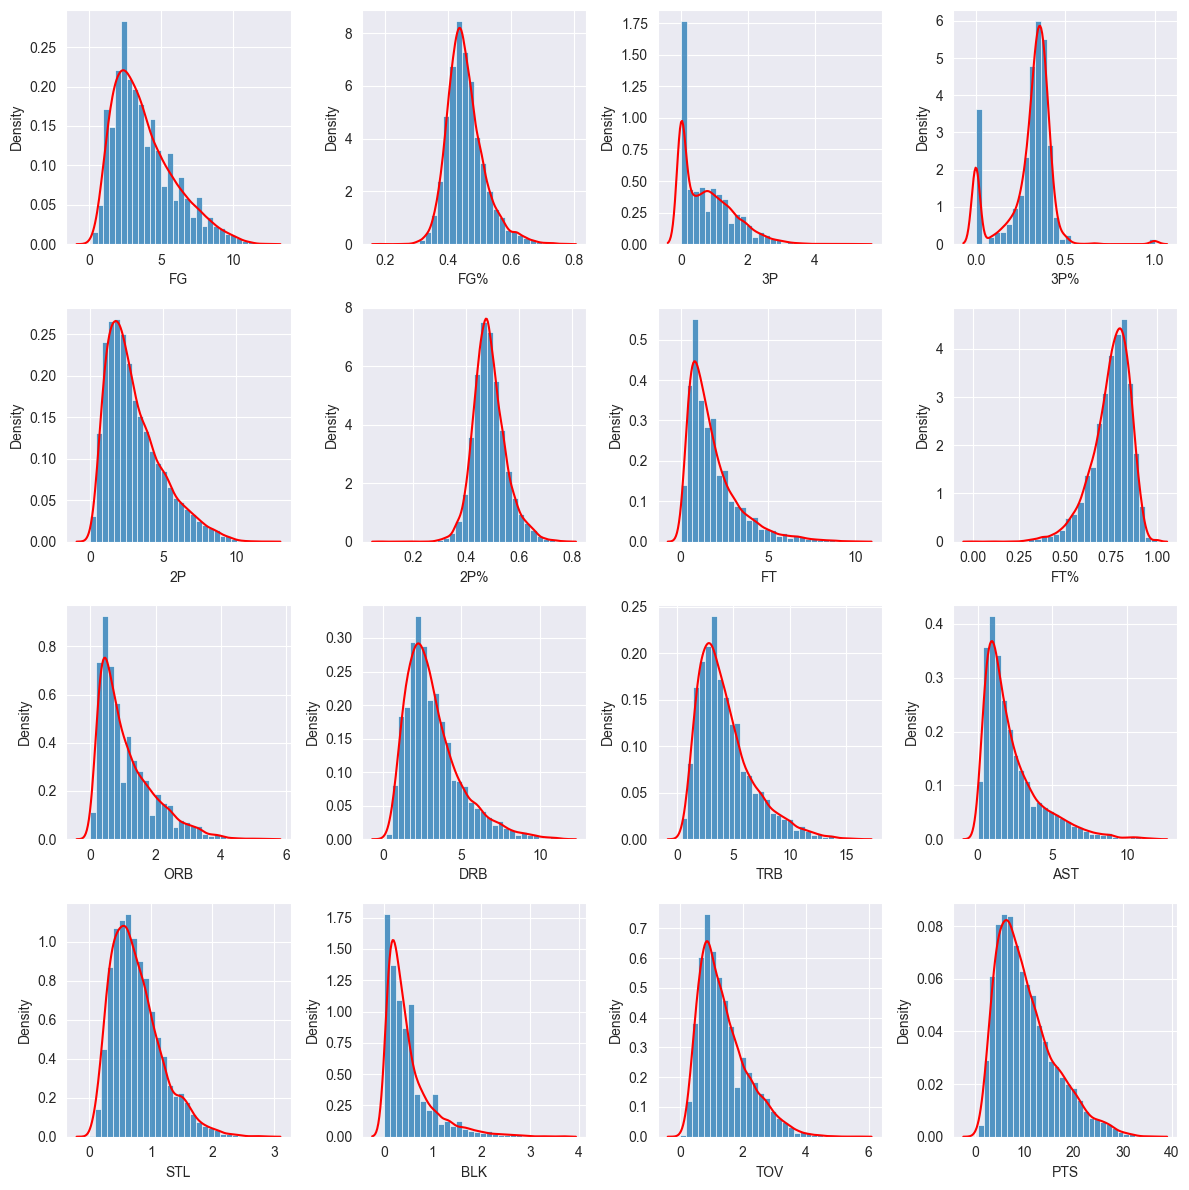

In [12]:
# Citation: Adapted from
# https://github.com/JustinGong03/nba-awards-predictor/blob/master/notebooks/nba_awards_predictor_part2.ipynb
# Accessed 2023

continuous_features = ["FG", "FG%", "3P", "3P%", "2P", "2P%", "FT", "FT%", "ORB", "DRB",
                        "TRB", "AST", "STL", "BLK", "TOV", "PTS"] # for game data

i = 1
plt.figure(figsize = (12, 12))
for x in continuous_features:
   plt.subplot(4, 4, i)
   i += 1
   sns.histplot(mvp[x], stat = "density", bins = 30)
   sns.kdeplot(mvp[x], color = "red")
plt.tight_layout()

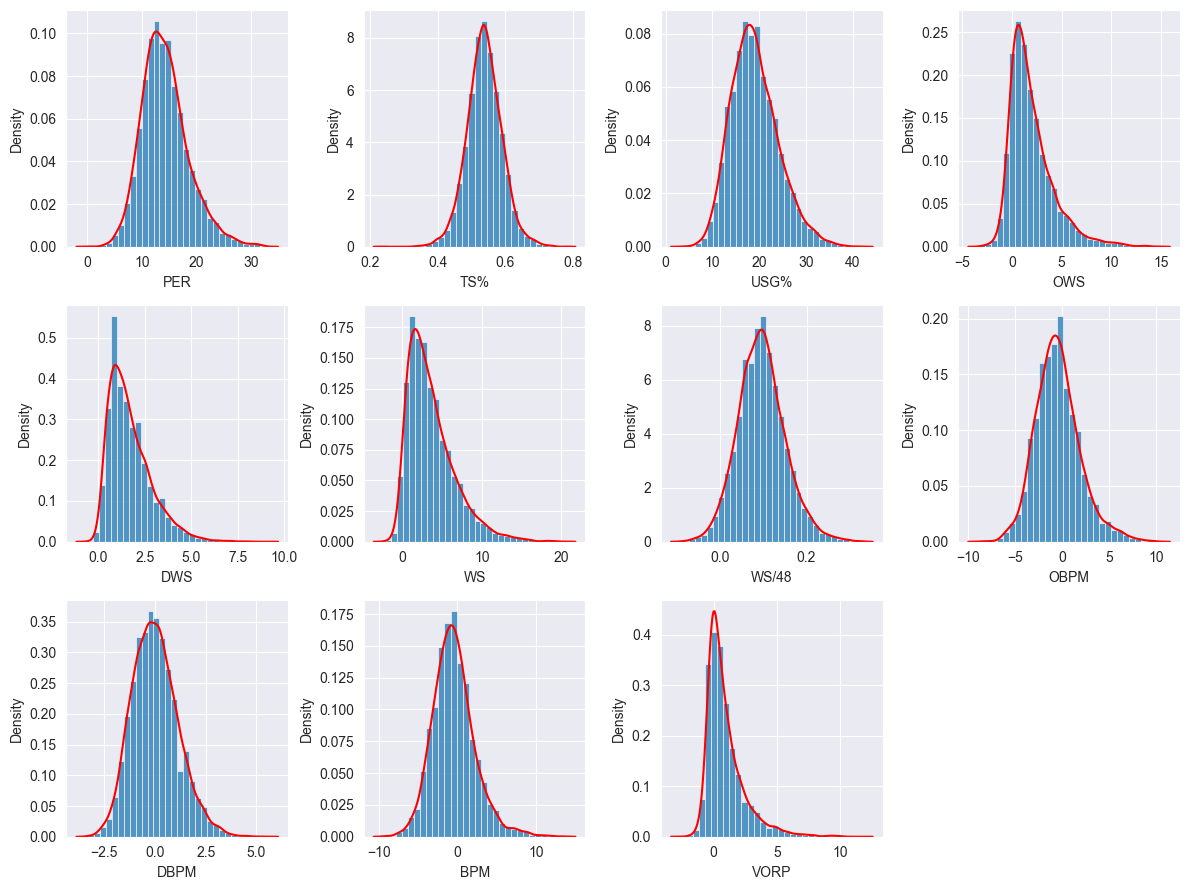

In [13]:
# For Advanced Features:

continuous_features = ['PER', 'TS%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
                        'DBPM', 'BPM', 'VORP']

plt.figure(figsize = (12, 9))
i = 1
for x in continuous_features:
   plt.subplot(3, 4, i)
   i = i + 1
   sns.histplot(mvp[x], stat = "density", bins = 30)
   sns.kdeplot(mvp[x], color = "red")
plt.tight_layout() 

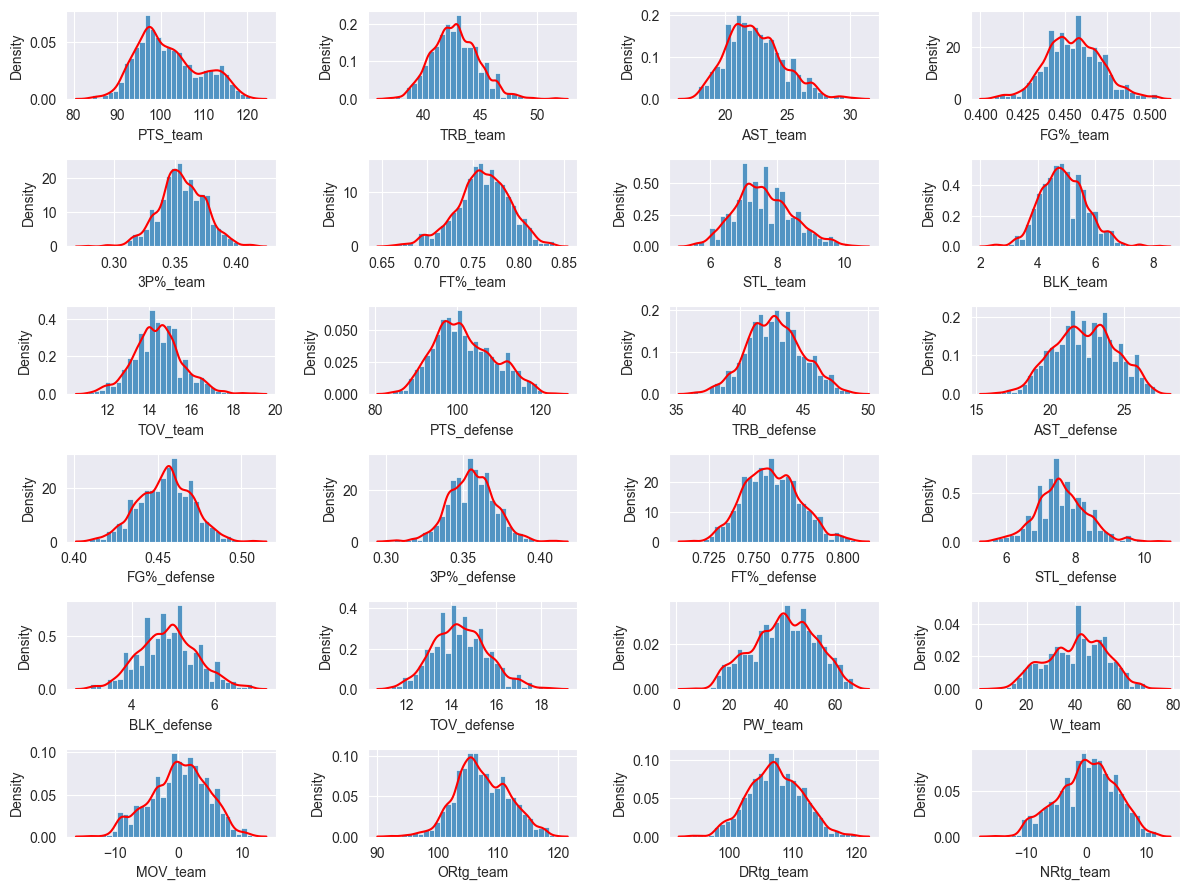

In [14]:
# Team Statistics 

continuous_features = ["PTS_team", "TRB_team", "AST_team", "FG%_team", "3P%_team", "FT%_team", "STL_team",
                        "BLK_team", "TOV_team", "PTS_defense", "TRB_defense", "AST_defense", "FG%_defense",
                        "3P%_defense", "FT%_defense", "STL_defense", "BLK_defense", "TOV_defense", "PW_team",
                        "W_team", "MOV_team", "ORtg_team", "DRtg_team", "NRtg_team"]

                        
plt.figure(figsize = (12, 9))
i = 1
for x in continuous_features:
   plt.subplot(6, 4, i)
   i = i + 1
   sns.histplot(mvp[x], stat = "density", bins = 30)
   sns.kdeplot(mvp[x], color = "red")
plt.tight_layout() 


A number of features are notably skewed, especially WS, OWS, and DWS, and 2P, 3P, BlK, STL. We may need to scale some of these later.

Next, we observe the distribution of the categorical data.

In [15]:
#checking the descriptive statistics to determine cut ranges
discrete_features = ['Age', 'G', 'GS', 'MP'] 
mvp[discrete_features].describe() 

Age            G           GS           MP
count  7767.000000  7767.000000  7767.000000  7767.000000
mean     26.677868    66.907686    35.360757    24.210828
std       4.270080    11.660937    29.241456     8.246266
min      18.000000    42.000000     0.000000     4.200000
25%      23.000000    58.000000     6.000000    17.600000
50%      26.000000    69.000000    29.000000    24.200000
75%      30.000000    77.000000    64.500000    31.000000
max      43.000000    85.000000    83.000000    43.700000

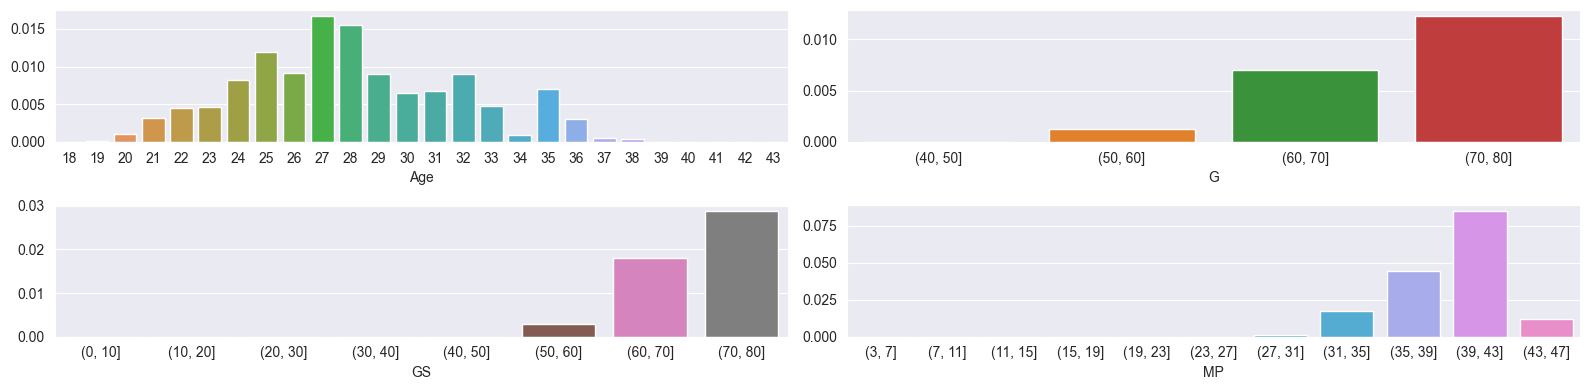

In [16]:
#cutting and grouping the data to create barplots
age = "Age" 
games = pd.cut(mvp["G"], np.arange(40, 90, 10))
games_started = pd.cut(mvp["GS"], np.arange(0, 90, 10))
minutes_played = pd.cut(mvp["MP"], np.arange(3, 50, 4))

plt.figure(figsize = (16, 4))
i = 1
for x in ([age, games, games_started, minutes_played]):
   plt.subplot(2, 2, i)
   i = i + 1
   group = mvp.groupby(x)["Share"].mean() #selected mean due to skewed behavior seen earlier
   sns.barplot(x = group.index, y = group.values)
plt.tight_layout()

Takeaways

- The age range for MVP votes is heavily between the range of 24 and 29 years. The only major exception tends to be Lebron James for a number of years into his mid-late 30s.
- More games played matters. Similarly, more games started matters, in a similar rate.
- More minutes played per game is important. Very few MVP vote-getters played less than 35 minutes a game.

In [17]:
# Check NA Values
pd.DataFrame(mvp.isna().sum()[mvp.isna().sum() > 0], columns = ["NA Values"])


NA Values
3P%                   587
FT%                     2
3P%_per36             587
FT%_per36               2
Attend./G_team         36

We note that all the missing values are for types of shots that some players do not attempt. We can ignore Attend/G_team, as in early years of this data set, attendance was not tracked for some teams. However, since there are only two values for FT% and per 36, we can see if we can drop these. For 3P% and per 36 values, we can replace their 3P% as 0

In [18]:
mvp[mvp["FT%"].isna()][["Player", "Year", "Share"]] #Checking which players have NaN FT% values


Player  Year  Share
3298  Damjan Rudež  2017    0.0
7312   Mike Miller  2016    0.0

These are clearly non essential, so we can rid of these

In [19]:
["FG", "3P", "3P%", "2P",  "FT", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PTS",  "OWS", "DWS", "WS", "VORP"]

['FG',
 '3P',
 '3P%',
 '2P',
 'FT',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PTS',
 'OWS',
 'DWS',
 'WS',
 'VORP']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

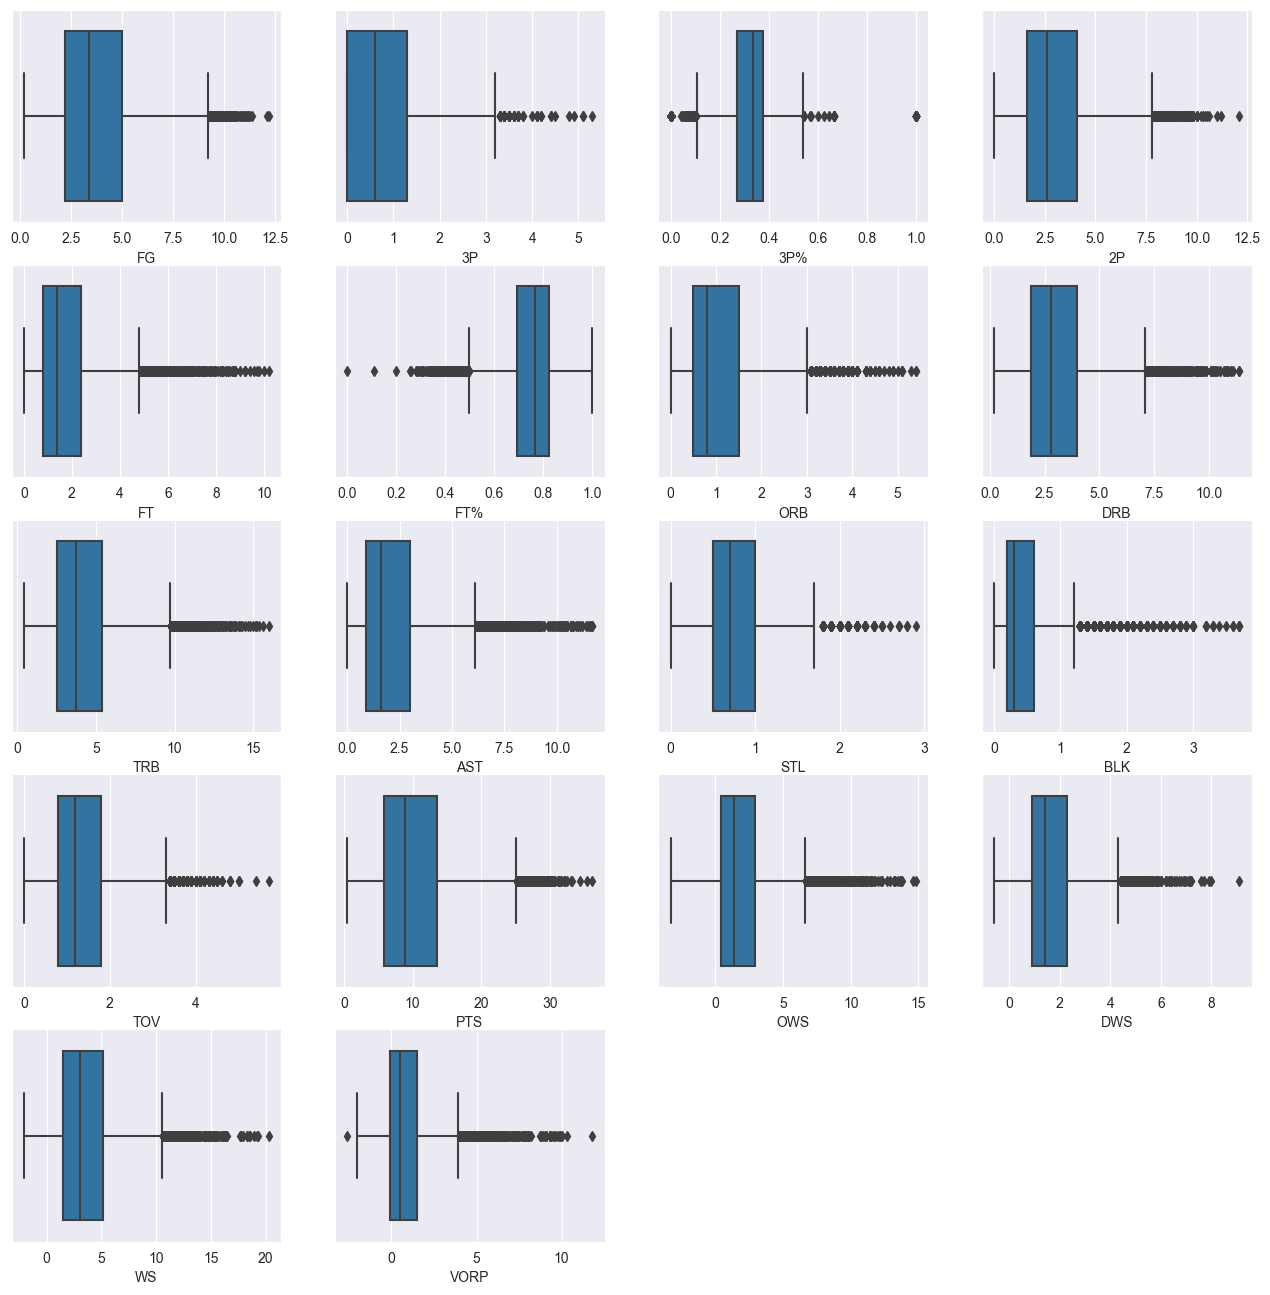

In [20]:
# Use Box and Whisper Plots to check for outliers

features = ["FG", "3P", "3P%", "2P",  "FT", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", 
               "TOV", "PTS",  "OWS", "DWS", "WS", "VORP"]
plt.figure(figsize = (16, 16))
i = 1
for x in features:
   plt.subplot(5, 4, i)
   i += 1
   sns.boxplot(x = x, data = mvp)
plt.tight_layout




/Users/abhivellore/nba_project/nba/nba_env/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/abhivellore/nba_project/nba/nba_env/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

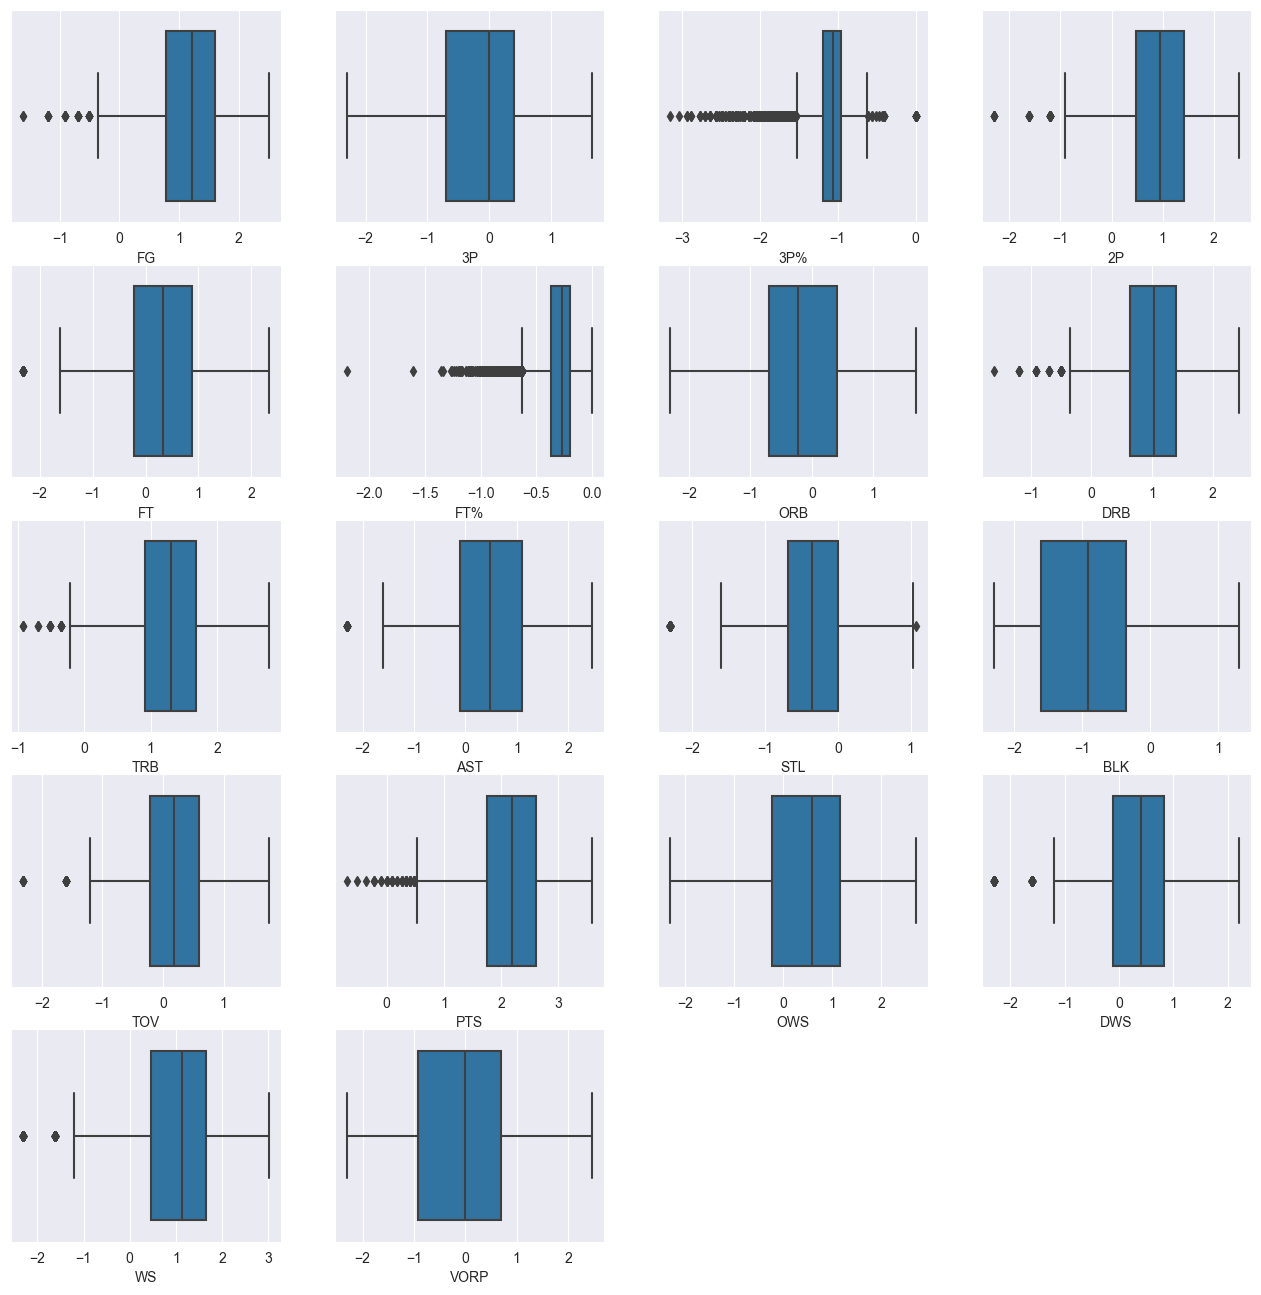

In [21]:
# Log Transform to get rid of outliers

def log_transform(data):
    transformed = np.log(data)
    transformed.replace([np.inf, -np.inf], np.nan, inplace = True)
    return transformed

transformed_data = mvp[features].apply(log_transform)
plt.figure(figsize = (16, 16))

i = 1
for x in features:
    plt.subplot(5, 4, i)
    i += 1
    sns.boxplot(x = x, data = transformed_data)
plt.tight_layout

After applying a log transform, we see that nearly all of our features have been normalized, with the percentages still being slightly skewed because of players who shoot 0%.

Next, we will inspect correlations between variables

<Axes: >

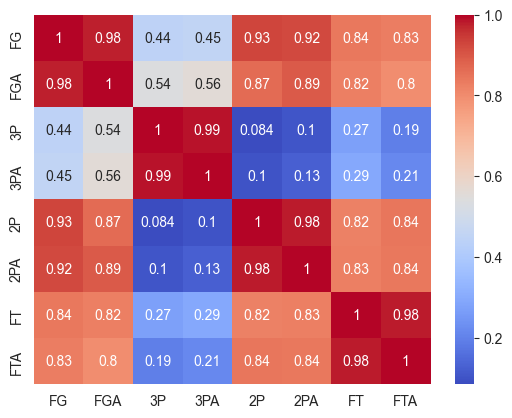

In [22]:
field_goals = abs(mvp[["FG", "FGA", "3P", "3PA", "2P", "2PA", "FT", "FTA"]].corr())
sns.heatmap(field_goals, cmap = "coolwarm", annot = True)


<Axes: >

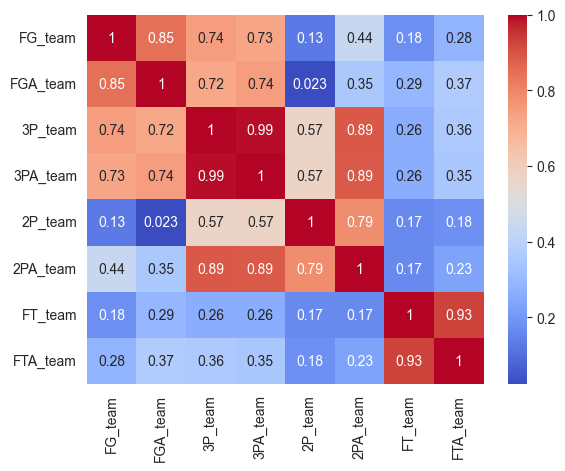

In [23]:
field_goals = abs(mvp[["FG_team", "FGA_team", "3P_team", "3PA_team", "2P_team", "2PA_team", "FT_team", "FTA_team"]].corr())
sns.heatmap(field_goals, cmap = "coolwarm", annot = True)

<Axes: >

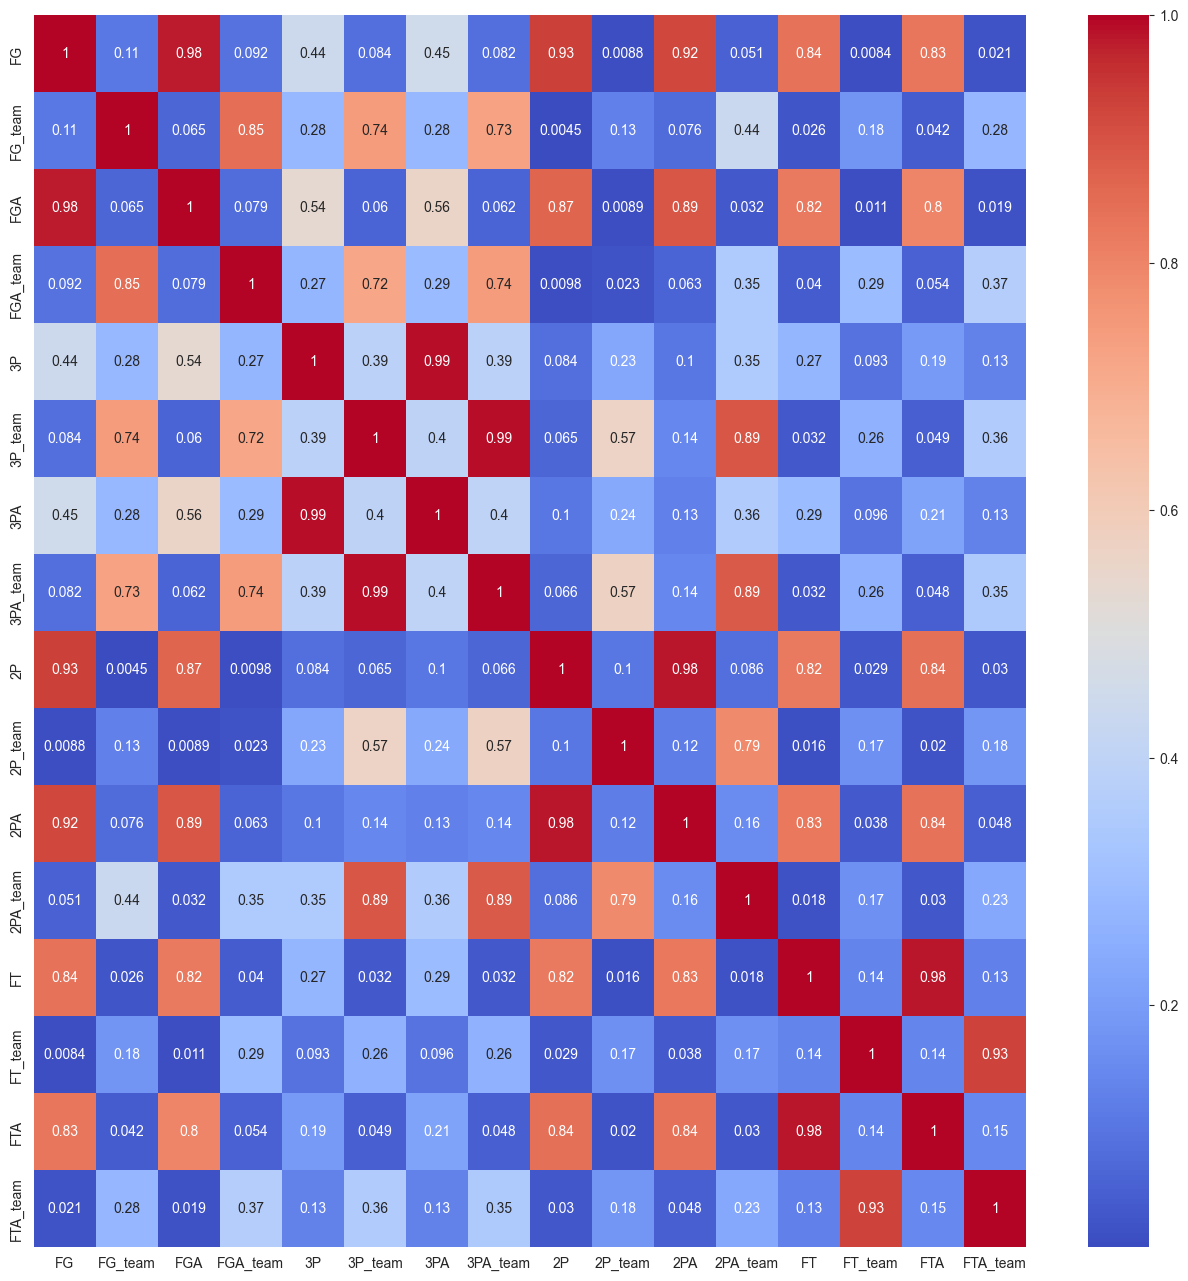

In [24]:
plt.figure(figsize = (16, 16))
field_goals = abs(mvp[["FG", "FG_team", "FGA", "FGA_team", "3P", "3P_team", "3PA", "3PA_team", "2P", "2P_team", 
                           "2PA", "2PA_team", "FT", "FT_team", "FTA", "FTA_team"]].corr())
sns.heatmap(field_goals, cmap = "coolwarm", annot = True)

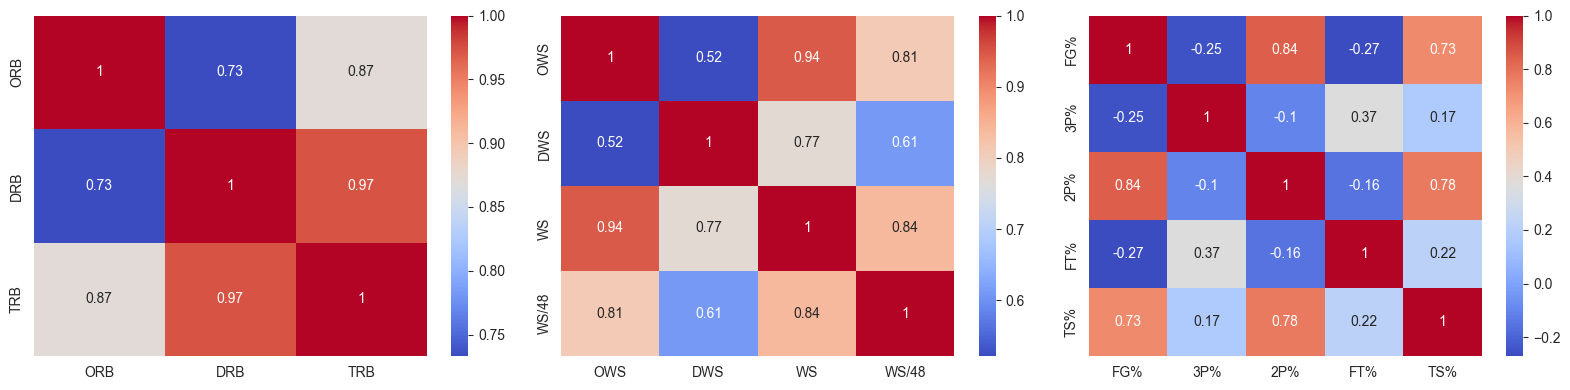

In [25]:
# Citation: From https://github.com/JustinGong03/nba-awards-predictor/blob/master/notebooks/nba_awards_predictor_part1.ipynb

#Analyzing correlation between other related statistic types
rebounds = ["ORB", "DRB", "TRB"]
win_shares = ["OWS", "DWS", "WS", "WS/48"]
shooting = ["FG%", "3P%", "2P%", "FT%", "TS%"]

plt.figure(figsize = (16, 4))
for x, y in enumerate([rebounds, win_shares, shooting]):
   plt.subplot(1, 3, (x + 1))
   sns.heatmap(mvp[y].corr(), cmap = "coolwarm", annot = True)
plt.tight_layout()

2. Explore New Variables for MIP Award

In [26]:
mip_winners = mip[mip["Share"] != 0]
mip_winners["Share"].describe()

count    616.000000
mean       0.065854
std        0.148936
min        0.002000
25%        0.005000
50%        0.010000
75%        0.044000
max        0.988000
Name: Share, dtype: float64

(array([518.,  41.,  23.,   4.,   6.,   7.,   9.,   1.,   4.,   3.]),
 array([0.002 , 0.1006, 0.1992, 0.2978, 0.3964, 0.495 , 0.5936, 0.6922,
        0.7908, 0.8894, 0.988 ]),
 <BarContainer object of 10 artists>)

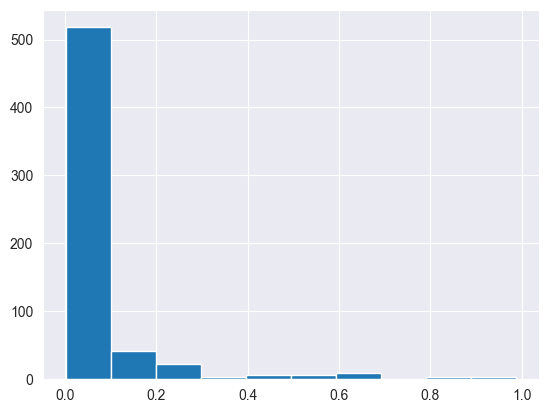

In [27]:
plt.hist(mip_winners["Share"])

Text(0.5, 0.98, 'Per Game Change Statistics')

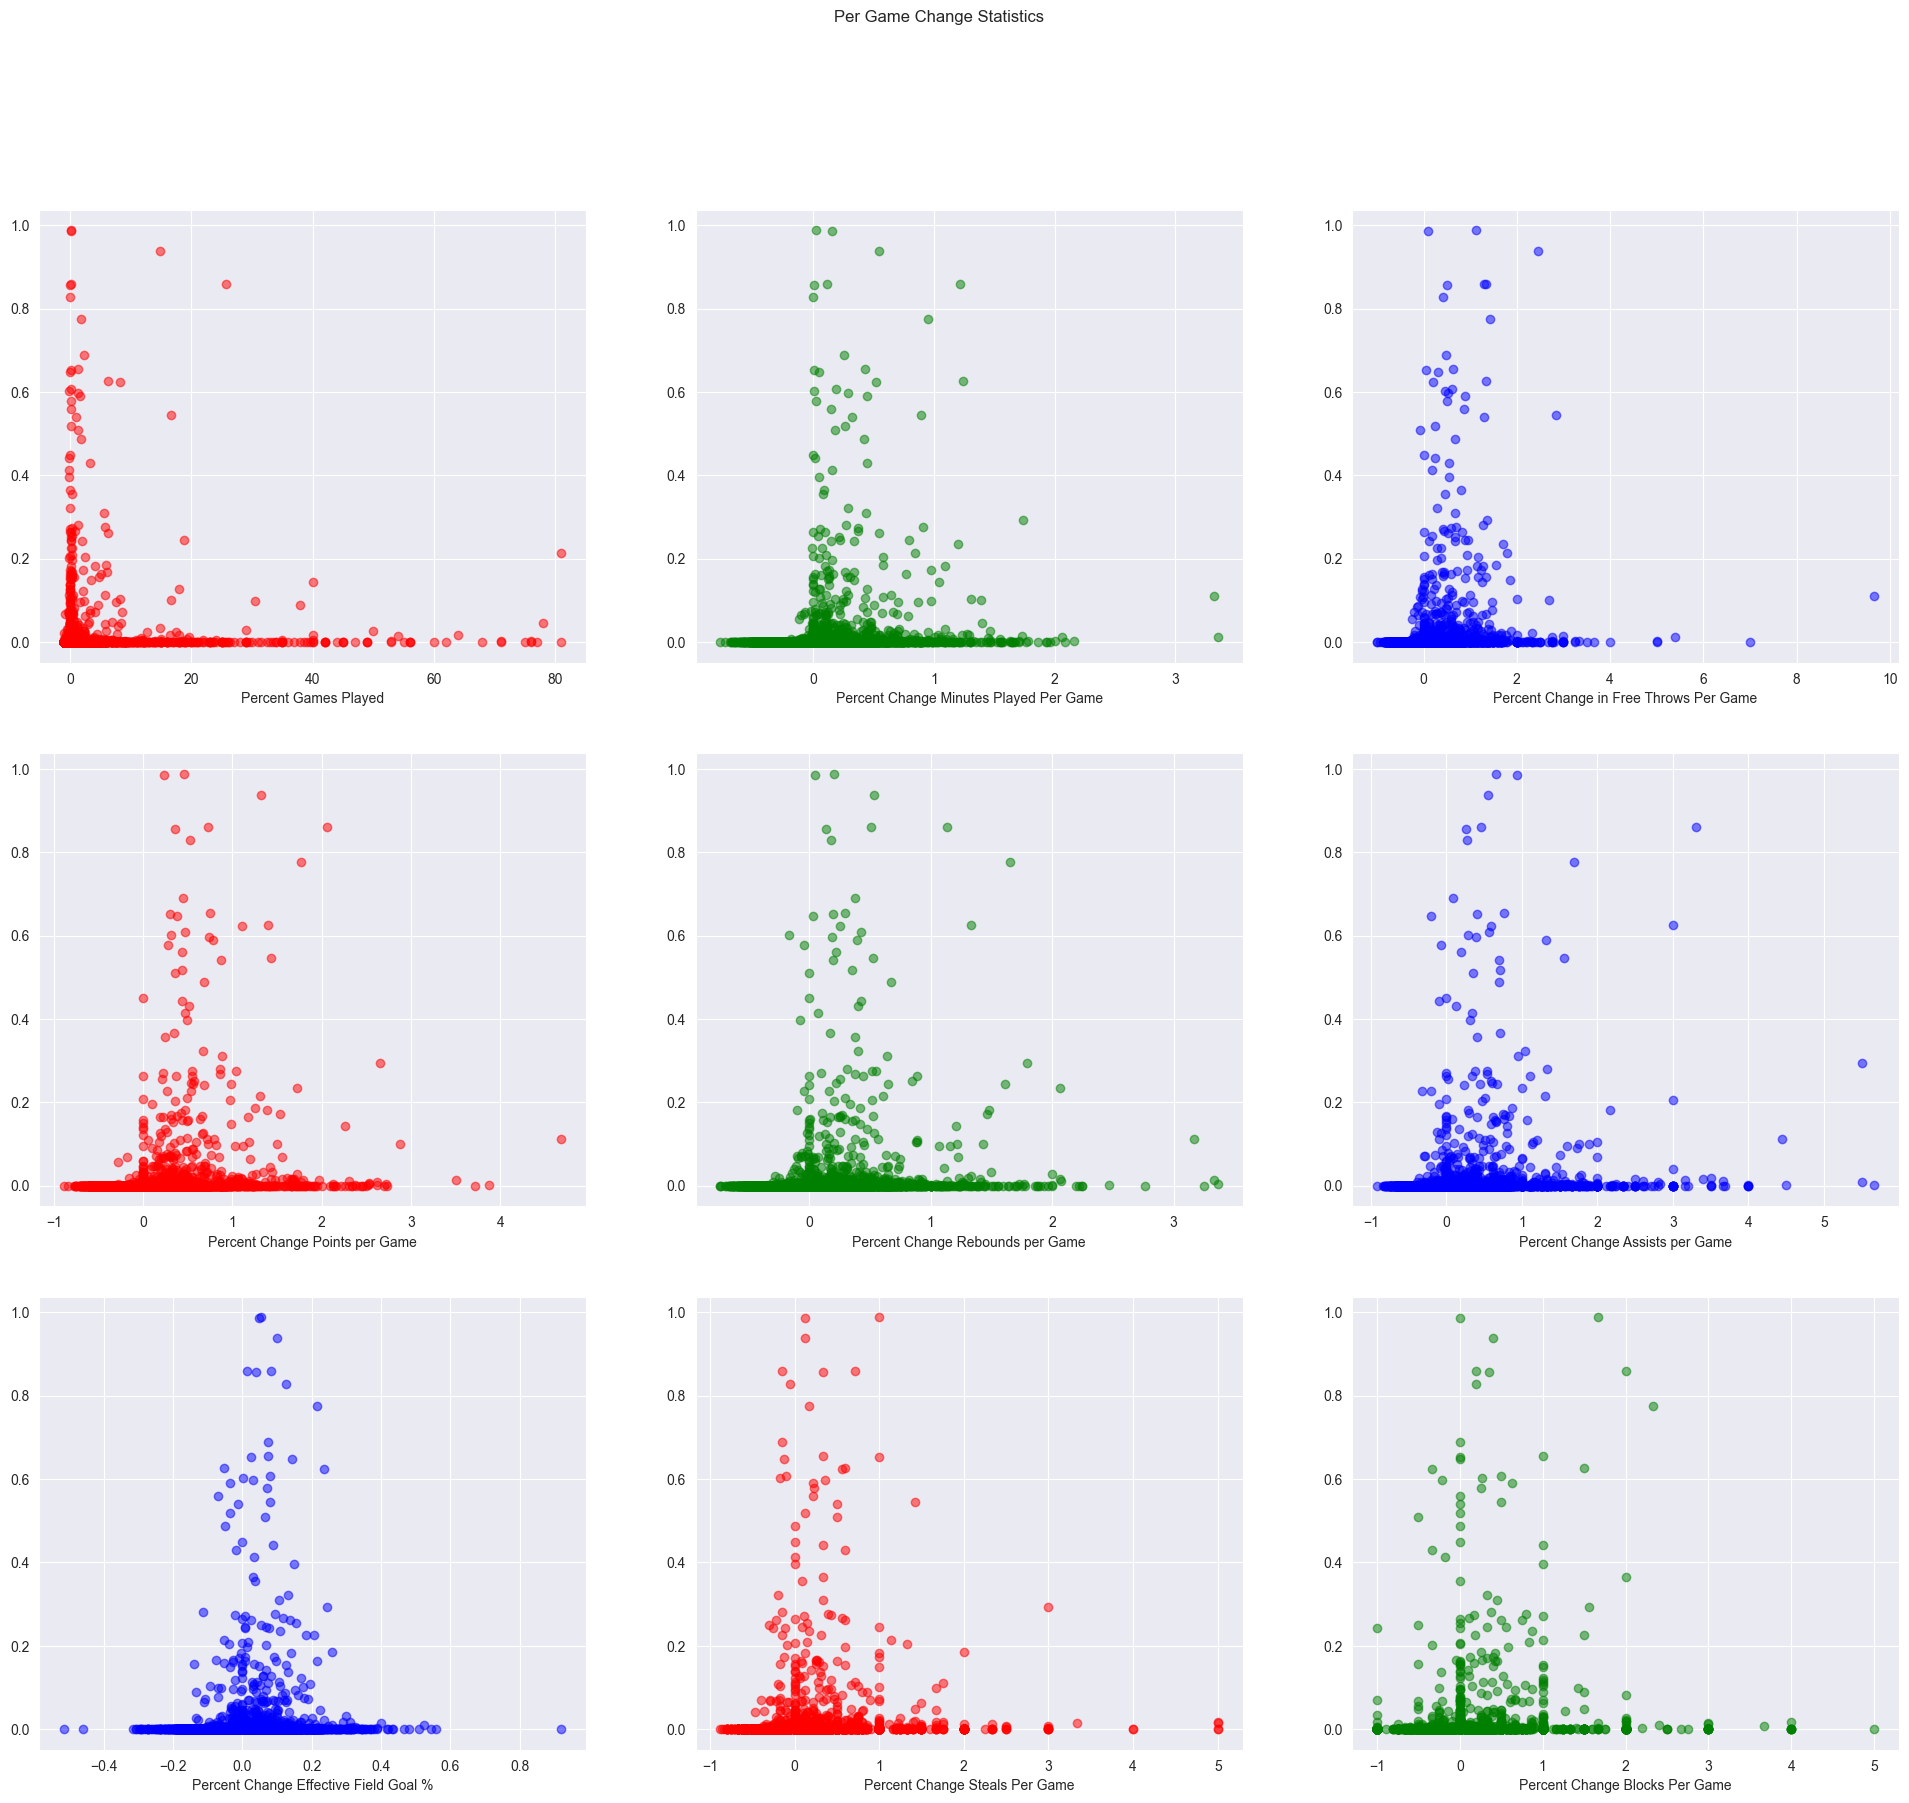

In [28]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (24, 20))
plt.subplot(3, 3, 1)
plt.scatter(mip["GS - %"], mip["Share"], c = "red", alpha = 0.5)
plt.xlabel("Percent Games Played")

plt.subplot(3, 3, 2)
plt.scatter(mip["MP - %"], mip["Share"], c = "green", alpha = 0.5)
plt.xlabel("Percent Change Minutes Played Per Game")

plt.subplot(3, 3, 3)
plt.scatter(mip["FTA - %"], mip["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Percent Change in Free Throws Per Game")

plt.subplot(3, 3, 4)
plt.scatter(mip["PTS - %"], mip["Share"], c = "red", alpha = 0.5)
plt.xlabel("Percent Change Points per Game")

plt.subplot(3, 3, 5)
plt.scatter(mip["TRB - %"], mip["Share"], c = "green", alpha = 0.5)
plt.xlabel("Percent Change Rebounds per Game")

plt.subplot(3, 3, 6)
plt.scatter(mip["AST - %"], mip["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Percent Change Assists per Game")

plt.subplot(3, 3, 7)
plt.scatter(mip["EFG - %"], mip["Share"], c = "blue", alpha = 0.5)
plt.xlabel("Percent Change Effective Field Goal %")

plt.subplot(3, 3, 8)
plt.scatter(mip["STL - %"], mip["Share"], c = "red", alpha = 0.5)
plt.xlabel("Percent Change Steals Per Game")

plt.subplot(3, 3, 9)
plt.scatter(mip["BLK - %"], mip["Share"], c = "green", alpha = 0.5)
plt.xlabel("Percent Change Blocks Per Game")

plt.suptitle("Per Game Change Statistics")


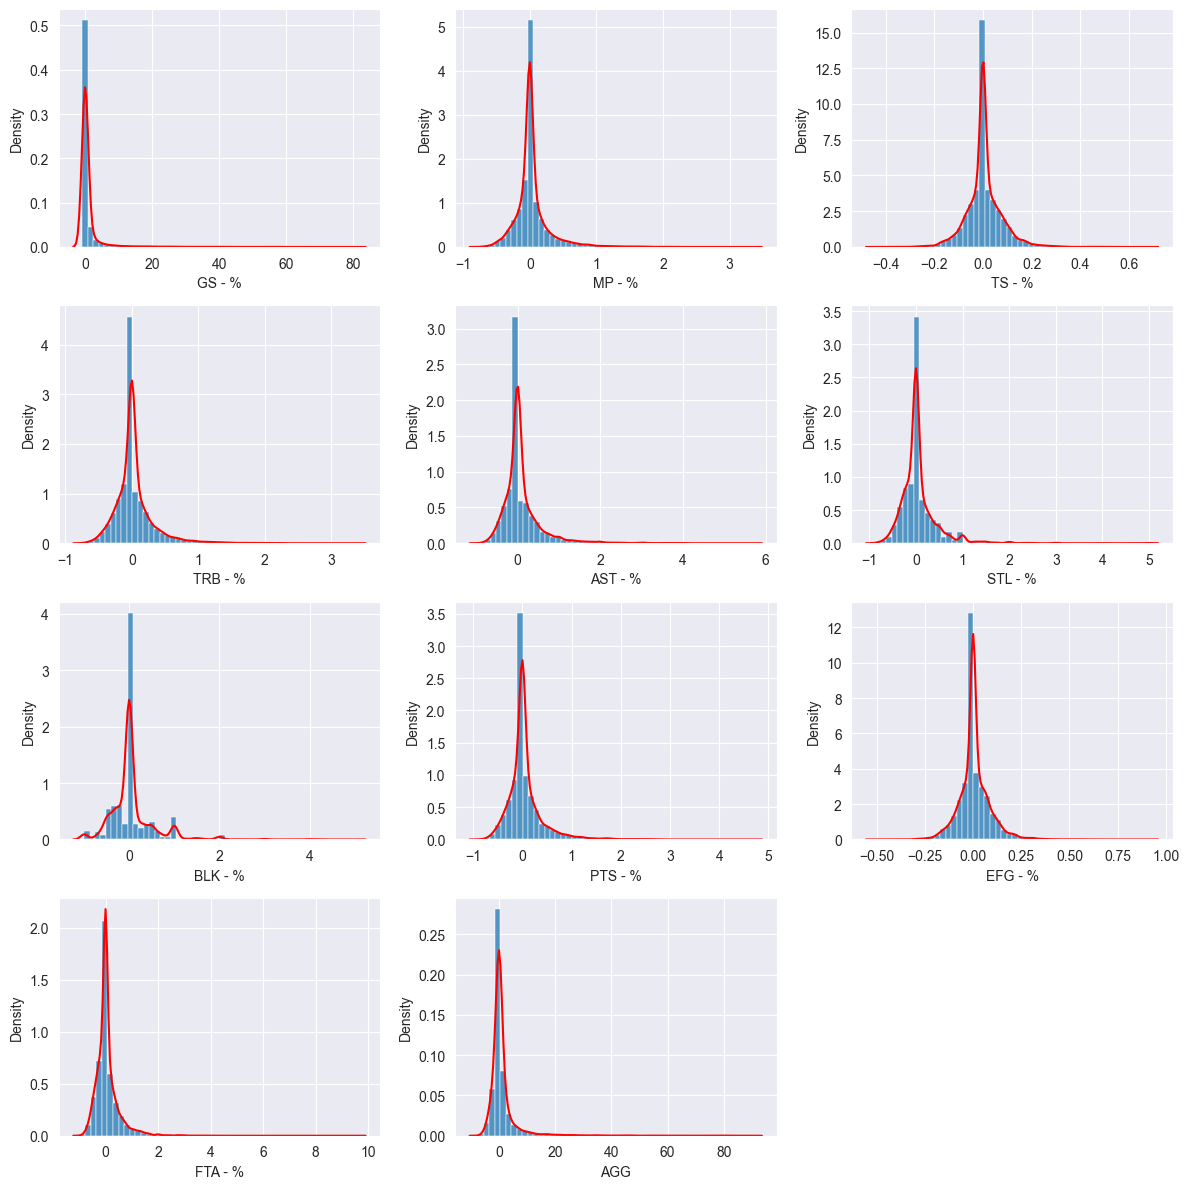

In [29]:
# Citation: Adapted from
# https://github.com/JustinGong03/nba-awards-predictor/blob/master/notebooks/nba_awards_predictor_part2.ipynb
# Accessed 2023

continuous_features = ["GS - %", "MP - %", "TS - %", "TRB - %", "AST - %", "STL - %", "BLK - %", "PTS - %", "EFG - %", 
                        "FTA - %", "AGG"] # for game data


i = 1
plt.figure(figsize = (12, 12))
for x in continuous_features:
   plt.subplot(4, 3, i)
   i += 1
   sns.histplot(mip[x], stat = "density", bins = 50)
   sns.kdeplot(mip[x], color = "red")
plt.tight_layout()

<Axes: >

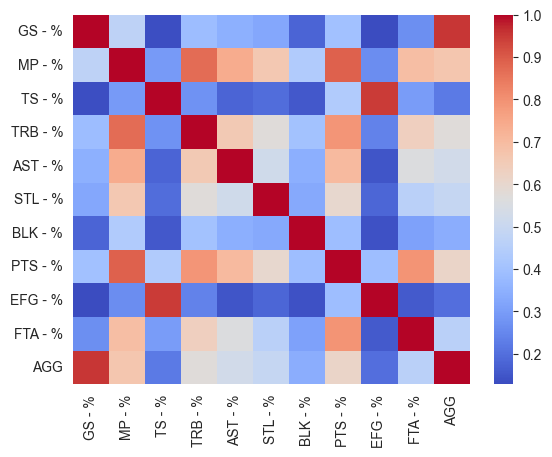

In [30]:
features = ["GS - %", "MP - %", "TS - %", "TRB - %", "AST - %", "STL - %", "BLK - %", "PTS - %", "EFG - %", 
                        "FTA - %", "AGG"]

sns.heatmap(mip[features].corr(), cmap = "coolwarm")

Our heatmap indicates that in general, there isn't too much correlation with variables, except for EFG % and TS %, which makes sense as both are calculated similarly, and GS% and AGG, as the aggregated sum includes GS - %, and often time is the largest numerical change. Interestingly, there also is a strong correlation between Points change, total rebounds change, and minutes played change.

3. Other Awards

The process for data exploration for the other awards is extremely similar, so we will not conduct any further EDA.